In [1]:
import pandas as pd
import numpy as np
from open_fdd.air_handling_unit.faults.helper_utils import HelperUtils

In [2]:
# Load your data
ahu_data = r"C:\Users\bbartling\Documents\WPCRC_Master.csv"
df = pd.read_csv(ahu_data)

df.head()

,timestamp,HWR_value,HWS_value,Heat_Calls,Oa_Temp,OaTemp_Enable,CWR_Temp,CWS_Temp,CWS_Freeze_SPt,CW_Valve,...,MA_Temp,EffSetpoint,EaDamper,SpaceTemp,RA_CO2,RA_Temp,VAV2_6_SpaceTemp,VAV2_7_SpaceTemp,VAV3_2_SpaceTemp,VAV3_5_SpaceTemp
0,2023-10-01 00:00:00,73.72,73.04,0.0,72.31,65.0,57.65,55.06,5.0,0.0,...,73.92,76.0,0.0,70.83,480.97,73.69,72.1,73.94,66.99,67.23
1,2023-10-01 00:05:00,73.72,73.04,0.0,72.22,65.0,57.75,55.18,5.0,0.0,...,73.92,76.0,0.0,70.83,480.97,73.69,72.1,73.94,66.99,67.23
2,2023-10-01 00:10:00,73.71,73.04,0.0,72.22,65.0,57.75,55.18,5.0,0.0,...,73.97,76.0,0.0,70.82,479.02,73.69,72.1,73.94,66.99,67.23
3,2023-10-01 00:15:00,73.71,73.05,0.0,72.15,65.0,57.85,55.25,5.0,0.0,...,74.01,76.0,0.0,70.82,480.96,73.68,72.1,73.94,66.99,67.23
4,2023-10-01 00:20:00,73.70,73.08,0.0,72.09,65.0,57.95,55.31,5.0,0.0,...,74.01,76.0,0.0,70.80,480.95,73.63,72.1,73.94,66.99,67.23


In [3]:
df.columns

Index(['timestamp', 'HWR_value', 'HWS_value', 'Heat_Calls', 'Oa_Temp',
       'OaTemp_Enable', 'CWR_Temp', 'CWS_Temp', 'CWS_Freeze_SPt', 'CW_Valve',
       'HW_Valve', 'DischargeTemp', 'Eff_DaSP', 'RaHumidity', 'Ra_Temp',
       'Ra_FanSpeed', 'OaTemp', 'Ma_Dampers', 'Ma_Temp', 'SaStaticSPt',
       'Sa_FanSpeed', 'SaTempSP', 'RaCO2', 'SaStatic', 'CurrentKWHrs',
       'CurrentKW', 'Eff_DaSPt', 'RaTemp', 'MaLowSPt', 'MaDampers',
       'SaStatic_SPt', 'SaTempSPt', 'CoolValve', 'OA_Damper', 'MA_Temp',
       'EffSetpoint', 'EaDamper', 'SpaceTemp', 'RA_CO2', 'RA_Temp',
       'VAV2_6_SpaceTemp', 'VAV2_7_SpaceTemp', 'VAV3_2_SpaceTemp',
       'VAV3_5_SpaceTemp'],
      dtype='object')

In [4]:
# Filter the DataFrame
filtered_df = df[(df['Sa_FanSpeed'] > 15.0) & (df['Oa_Temp'] < 10.0)]

# Get the description of the 'OA_Damper' column
oa_damper_description = filtered_df['OA_Damper'].describe()

# Print the description
oa_damper_description

count    3339.000000
mean        9.216119
std         9.964637
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        20.000000
Name: OA_Damper, dtype: float64

In [5]:
# Checking data types of each column
print("Data Types:")
print(df.dtypes)

Data Types:
timestamp            object
HWR_value           float64
HWS_value           float64
Heat_Calls          float64
Oa_Temp             float64
OaTemp_Enable       float64
CWR_Temp            float64
CWS_Temp            float64
CWS_Freeze_SPt      float64
CW_Valve            float64
HW_Valve            float64
DischargeTemp       float64
Eff_DaSP            float64
RaHumidity          float64
Ra_Temp             float64
Ra_FanSpeed         float64
OaTemp              float64
Ma_Dampers          float64
Ma_Temp             float64
SaStaticSPt         float64
Sa_FanSpeed         float64
SaTempSP            float64
RaCO2               float64
SaStatic            float64
CurrentKWHrs        float64
CurrentKW           float64
Eff_DaSPt           float64
RaTemp              float64
MaLowSPt            float64
MaDampers           float64
SaStatic_SPt        float64
SaTempSPt           float64
CoolValve           float64
OA_Damper           float64
MA_Temp             float64
EffSetpo

In [6]:
# Checking max values of each column
print("\nMax Values:")
print(df.max(numeric_only=True))


Max Values:
HWR_value            178.16
HWS_value            180.55
Heat_Calls            15.00
Oa_Temp               98.55
OaTemp_Enable         75.00
CWR_Temp              92.10
CWS_Temp              91.04
CWS_Freeze_SPt         5.00
CW_Valve             100.00
HW_Valve             100.00
DischargeTemp         96.73
Eff_DaSP              63.00
RaHumidity            88.44
Ra_Temp               81.82
Ra_FanSpeed           86.00
OaTemp                98.55
Ma_Dampers           100.00
Ma_Temp               80.38
SaStaticSPt            0.90
Sa_FanSpeed          100.00
SaTempSP              70.00
RaCO2               1321.36
SaStatic               0.87
CurrentKWHrs          15.30
CurrentKW            120.98
Eff_DaSPt             63.00
RaTemp                79.19
MaLowSPt              64.62
MaDampers             50.00
SaStatic_SPt           0.90
SaTempSPt             70.00
CoolValve            100.00
OA_Damper            100.00
MA_Temp               80.73
EffSetpoint           76.00
EaDampe

If you notice above these cols are floats from 0 to 100.0 for the control system analog outputs. Open-fdd expects floats from 0 to 1.0 for percentage of command. Some control system data is 0 - 100.0 and some is 0 - 1.0. If you do pass in a 0 to 100.0 for the control system analog outputs there are checks under the hood that will flag it. 

```python
Sa_FanSpeed          100.00
CW_Valve             100.00
HW_Valve             100.00
Ma_Dampers           100.00
```

In [7]:

percentage_columns = [
    ["Sa_FanSpeed"],
    ["CW_Valve"],
    ["HW_Valve"],
    ["Ma_Dampers"],
]

for col in percentage_columns:
    df[col] = df[col] / 100.0

df.head()

,timestamp,HWR_value,HWS_value,Heat_Calls,Oa_Temp,OaTemp_Enable,CWR_Temp,CWS_Temp,CWS_Freeze_SPt,CW_Valve,...,MA_Temp,EffSetpoint,EaDamper,SpaceTemp,RA_CO2,RA_Temp,VAV2_6_SpaceTemp,VAV2_7_SpaceTemp,VAV3_2_SpaceTemp,VAV3_5_SpaceTemp
0,2023-10-01 00:00:00,73.72,73.04,0.0,72.31,65.0,57.65,55.06,5.0,0.0,...,73.92,76.0,0.0,70.83,480.97,73.69,72.1,73.94,66.99,67.23
1,2023-10-01 00:05:00,73.72,73.04,0.0,72.22,65.0,57.75,55.18,5.0,0.0,...,73.92,76.0,0.0,70.83,480.97,73.69,72.1,73.94,66.99,67.23
2,2023-10-01 00:10:00,73.71,73.04,0.0,72.22,65.0,57.75,55.18,5.0,0.0,...,73.97,76.0,0.0,70.82,479.02,73.69,72.1,73.94,66.99,67.23
3,2023-10-01 00:15:00,73.71,73.05,0.0,72.15,65.0,57.85,55.25,5.0,0.0,...,74.01,76.0,0.0,70.82,480.96,73.68,72.1,73.94,66.99,67.23
4,2023-10-01 00:20:00,73.70,73.08,0.0,72.09,65.0,57.95,55.31,5.0,0.0,...,74.01,76.0,0.0,70.80,480.95,73.63,72.1,73.94,66.99,67.23


In [8]:
# Convert the timestamp column to datetime and set it as the index
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.set_index("timestamp", inplace=True)

df.head()

,HWR_value,HWS_value,Heat_Calls,Oa_Temp,OaTemp_Enable,CWR_Temp,CWS_Temp,CWS_Freeze_SPt,CW_Valve,HW_Valve,...,MA_Temp,EffSetpoint,EaDamper,SpaceTemp,RA_CO2,RA_Temp,VAV2_6_SpaceTemp,VAV2_7_SpaceTemp,VAV3_2_SpaceTemp,VAV3_5_SpaceTemp
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-10-01 00:00:00,73.72,73.04,0.0,72.31,65.0,57.65,55.06,5.0,0.0,0.0,...,73.92,76.0,0.0,70.83,480.97,73.69,72.1,73.94,66.99,67.23
2023-10-01 00:05:00,73.72,73.04,0.0,72.22,65.0,57.75,55.18,5.0,0.0,0.0,...,73.92,76.0,0.0,70.83,480.97,73.69,72.1,73.94,66.99,67.23
2023-10-01 00:10:00,73.71,73.04,0.0,72.22,65.0,57.75,55.18,5.0,0.0,0.0,...,73.97,76.0,0.0,70.82,479.02,73.69,72.1,73.94,66.99,67.23
2023-10-01 00:15:00,73.71,73.05,0.0,72.15,65.0,57.85,55.25,5.0,0.0,0.0,...,74.01,76.0,0.0,70.82,480.96,73.68,72.1,73.94,66.99,67.23
2023-10-01 00:20:00,73.70,73.08,0.0,72.09,65.0,57.95,55.31,5.0,0.0,0.0,...,74.01,76.0,0.0,70.80,480.95,73.63,72.1,73.94,66.99,67.23


In [9]:


# Filter the DataFrame for the month of July
df = df.loc["2024-07"]

#df


Setup the config dict to pass in column names

In [10]:
# Configuration dictionary
config_dict = {
    # used for report name
    'AHU_NAME': "MZVAV_1",

    # timestamp column name
    'INDEX_COL_NAME': "timestamp",

    'DUCT_STATIC_COL': "SaStatic",
    'DUCT_STATIC_SETPOINT_COL': "SaStaticSPt",
    'SUPPLY_VFD_SPEED_COL': "Sa_FanSpeed",
    'MAT_COL': "MA_Temp",
    'OAT_COL': "OaTemp",
    'SAT_COL': "SaTempSP",
    'RAT_COL': "RaTemp",
    'HEATING_SIG_COL': "HW_Valve",  
    'COOLING_SIG_COL': "CW_Valve",  
    'ECONOMIZER_SIG_COL': "Ma_Dampers",
    'SUPPLY_FAN_AIR_VOLUME_COL': None,  # Set to None to potentially skip Fault Condition 6

    'SAT_SETPOINT_COL': "SaTempSPt",
    'CONSTANT_LEAVE_TEMP_SP': False,
    'CONSTANT_LEAVE_TEMP_SP_VAL': 55.0,

    'VFD_SPEED_PERCENT_ERR_THRES': 0.05,
    'VFD_SPEED_PERCENT_MAX': 0.99,
    'DUCT_STATIC_INCHES_ERR_THRES': 0.1,
    'OUTDOOR_DEGF_ERR_THRES': 5.0,
    'MIX_DEGF_ERR_THRES': 5.0,
    'RETURN_DEGF_ERR_THRES': 2.0,
    'SUPPLY_DEGF_ERR_THRES': 2.0,
    'DELTA_T_SUPPLY_FAN': 2.0,

    'DELTA_OS_MAX': 3,
    'AHU_MIN_OA_DPR': 0.20, # Found from the previous summary stats
    'OAT_RAT_DELTA_MIN': 10,
    'AIRFLOW_ERR_THRES': 0.3,
    'AHU_MIN_OA_CFM_DESIGN': 2500,
    'TROUBLESHOOT_MODE': False,
    'ROLLING_WINDOW_SIZE': 10
}

On really large data set this can take a few minutes to run

In [11]:
helper_utils = HelperUtils()
df_combined, df_fc4, fault_counts_df = helper_utils.process_all_faults(df, config_dict)

fault_counts_df

fc1 done
Duct static pressure too low with fan operating near max speed
fault sum:  0
fc2 done
Mix temp too low; should be between outside and return temp
fault sum:  0
fc3 done
Mix temp too high; should be between outside and return temp
fault sum:  0
The program is in FC4 and resampling the data to compute AHU OS state changes per hour takes a while to run...
fc4 done
PID hunting; too many operating state changes per hour
fault sum:  15
fc5 done
Supply temp too low should be higher than mix temp
fault sum:  0
fc7 done
Supply temp too low in full heating
fault sum:  0
fc8 done
Supply and mix temp should be approx equal in econ mode
fault sum:  16
fc9 done
Outside temp too high in free cooling without additional mech cooling plus econ
fault sum:  0
fc10 done
Outdoor temp and mix temp should be approx equal in mech cooling plus econ
fault sum:  126
fc11 done
Outside temp too low for mech cooling plus econ
fault sum:  0
fc12 done
Supply temp too high should be less than mix temp in mech 

,Fault Condition,Count
0,fc1_fault_sum,0
1,fc2_fault_sum,0
2,fc3_fault_sum,0
3,fc4_fault_sum,15
4,fc5_fault_sum,0
5,fc7_fault_sum,0
6,fc8_fault_sum,16
7,fc9_fault_sum,0
8,fc10_fault_sum,126
9,fc11_fault_sum,0


In [12]:
df_fc4.columns

Index(['HWR_value', 'HWS_value', 'Heat_Calls', 'Oa_Temp', 'OaTemp_Enable',
       'CWR_Temp', 'CWS_Temp', 'CWS_Freeze_SPt', 'CW_Valve', 'HW_Valve',
       'DischargeTemp', 'Eff_DaSP', 'RaHumidity', 'Ra_Temp', 'Ra_FanSpeed',
       'OaTemp', 'Ma_Dampers', 'Ma_Temp', 'SaStaticSPt', 'Sa_FanSpeed',
       'SaTempSP', 'RaCO2', 'SaStatic', 'CurrentKWHrs', 'CurrentKW',
       'Eff_DaSPt', 'RaTemp', 'MaLowSPt', 'MaDampers', 'SaStatic_SPt',
       'SaTempSPt', 'CoolValve', 'OA_Damper', 'MA_Temp', 'EffSetpoint',
       'EaDamper', 'SpaceTemp', 'RA_CO2', 'RA_Temp', 'VAV2_6_SpaceTemp',
       'VAV2_7_SpaceTemp', 'VAV3_2_SpaceTemp', 'VAV3_5_SpaceTemp',
       'heating_mode', 'econ_only_cooling_mode', 'econ_plus_mech_cooling_mode',
       'mech_cooling_only_mode', 'fc4_flag'],
      dtype='object')

In [13]:
df_combined.columns

Index(['HWR_value', 'HWS_value', 'Heat_Calls', 'Oa_Temp', 'OaTemp_Enable',
       'CWR_Temp', 'CWS_Temp', 'CWS_Freeze_SPt', 'CW_Valve', 'HW_Valve',
       'DischargeTemp', 'Eff_DaSP', 'RaHumidity', 'Ra_Temp', 'Ra_FanSpeed',
       'OaTemp', 'Ma_Dampers', 'Ma_Temp', 'SaStaticSPt', 'Sa_FanSpeed',
       'SaTempSP', 'RaCO2', 'SaStatic', 'CurrentKWHrs', 'CurrentKW',
       'Eff_DaSPt', 'RaTemp', 'MaLowSPt', 'MaDampers', 'SaStatic_SPt',
       'SaTempSPt', 'CoolValve', 'OA_Damper', 'MA_Temp', 'EffSetpoint',
       'EaDamper', 'SpaceTemp', 'RA_CO2', 'RA_Temp', 'VAV2_6_SpaceTemp',
       'VAV2_7_SpaceTemp', 'VAV3_2_SpaceTemp', 'VAV3_5_SpaceTemp',
       'static_check_', 'fan_check_', 'combined_check', 'fc1_flag', 'fc2_flag',
       'fc3_flag', 'fc5_flag', 'fc7_flag', 'fc8_flag', 'fc9_flag', 'fc10_flag',
       'fc11_flag', 'fc12_flag'],
      dtype='object')

In [14]:
df.head()

,HWR_value,HWS_value,Heat_Calls,Oa_Temp,OaTemp_Enable,CWR_Temp,CWS_Temp,CWS_Freeze_SPt,CW_Valve,HW_Valve,...,MA_Temp,EffSetpoint,EaDamper,SpaceTemp,RA_CO2,RA_Temp,VAV2_6_SpaceTemp,VAV2_7_SpaceTemp,VAV3_2_SpaceTemp,VAV3_5_SpaceTemp
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-07-01 00:00:00,78.61,75.02,0.0,59.48,60.0,55.02,52.64,5.0,0.0,0.0,...,72.27,76.0,0.0,69.57,420.86,71.62,71.62,72.04,72.94,70.79
2024-07-01 00:05:00,78.59,74.99,0.0,59.41,60.0,55.11,52.71,5.0,0.0,0.0,...,72.27,76.0,0.0,69.57,420.86,71.62,71.60,72.02,72.86,70.78
2024-07-01 00:10:00,78.55,74.94,0.0,59.39,60.0,55.18,52.78,5.0,0.0,0.0,...,72.27,76.0,0.0,69.57,420.74,71.61,71.58,71.99,72.82,70.78
2024-07-01 00:15:00,78.51,74.89,0.0,59.29,60.0,55.28,52.86,5.0,0.0,0.0,...,72.27,76.0,0.0,69.55,420.76,71.56,71.58,71.95,72.80,70.77
2024-07-01 00:20:00,78.48,74.84,0.0,59.24,60.0,55.36,52.95,5.0,0.0,0.0,...,72.27,76.0,0.0,69.54,422.69,71.51,71.55,71.93,72.77,70.78


Fault Condition 1: Duct static too low at fan at full speed


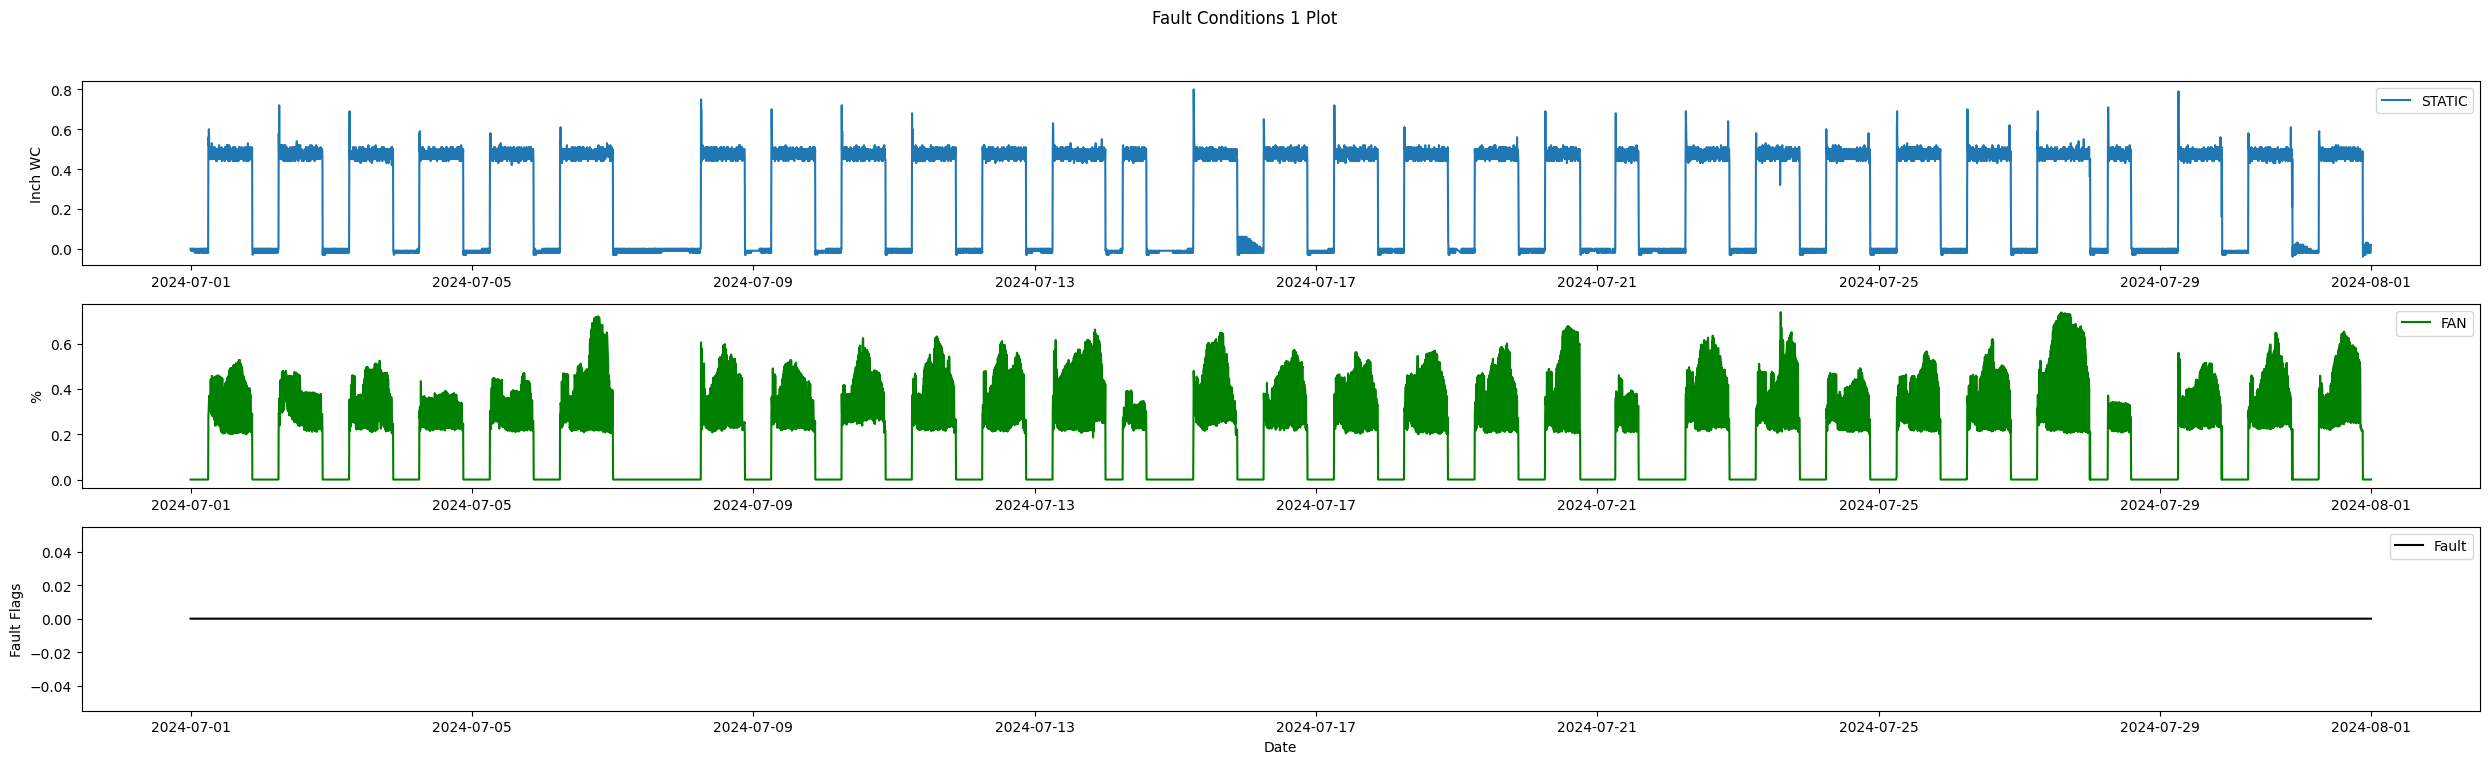

total days: 31.0
total hours: 744
hours fc1 mode: 0
percent true: 0.0
percent false: 100.0
flag true duct static: nan
flag true duct static spt: nan
hours motor runtime: 434.5
Fault Flag Count:  0
NO FAULTS FOUND - Skipping time-of-day Histogram plot


In [15]:
from open_fdd.air_handling_unit.reports.report_fc1 import FaultCodeOneReport

# Create an instance of FaultCodeFourReport
fc1_report = FaultCodeOneReport(config_dict)
fc1_report.display_report_in_ipython(df_combined)

Fault Condition 2: Mix temperature too low; should be between outside and return air


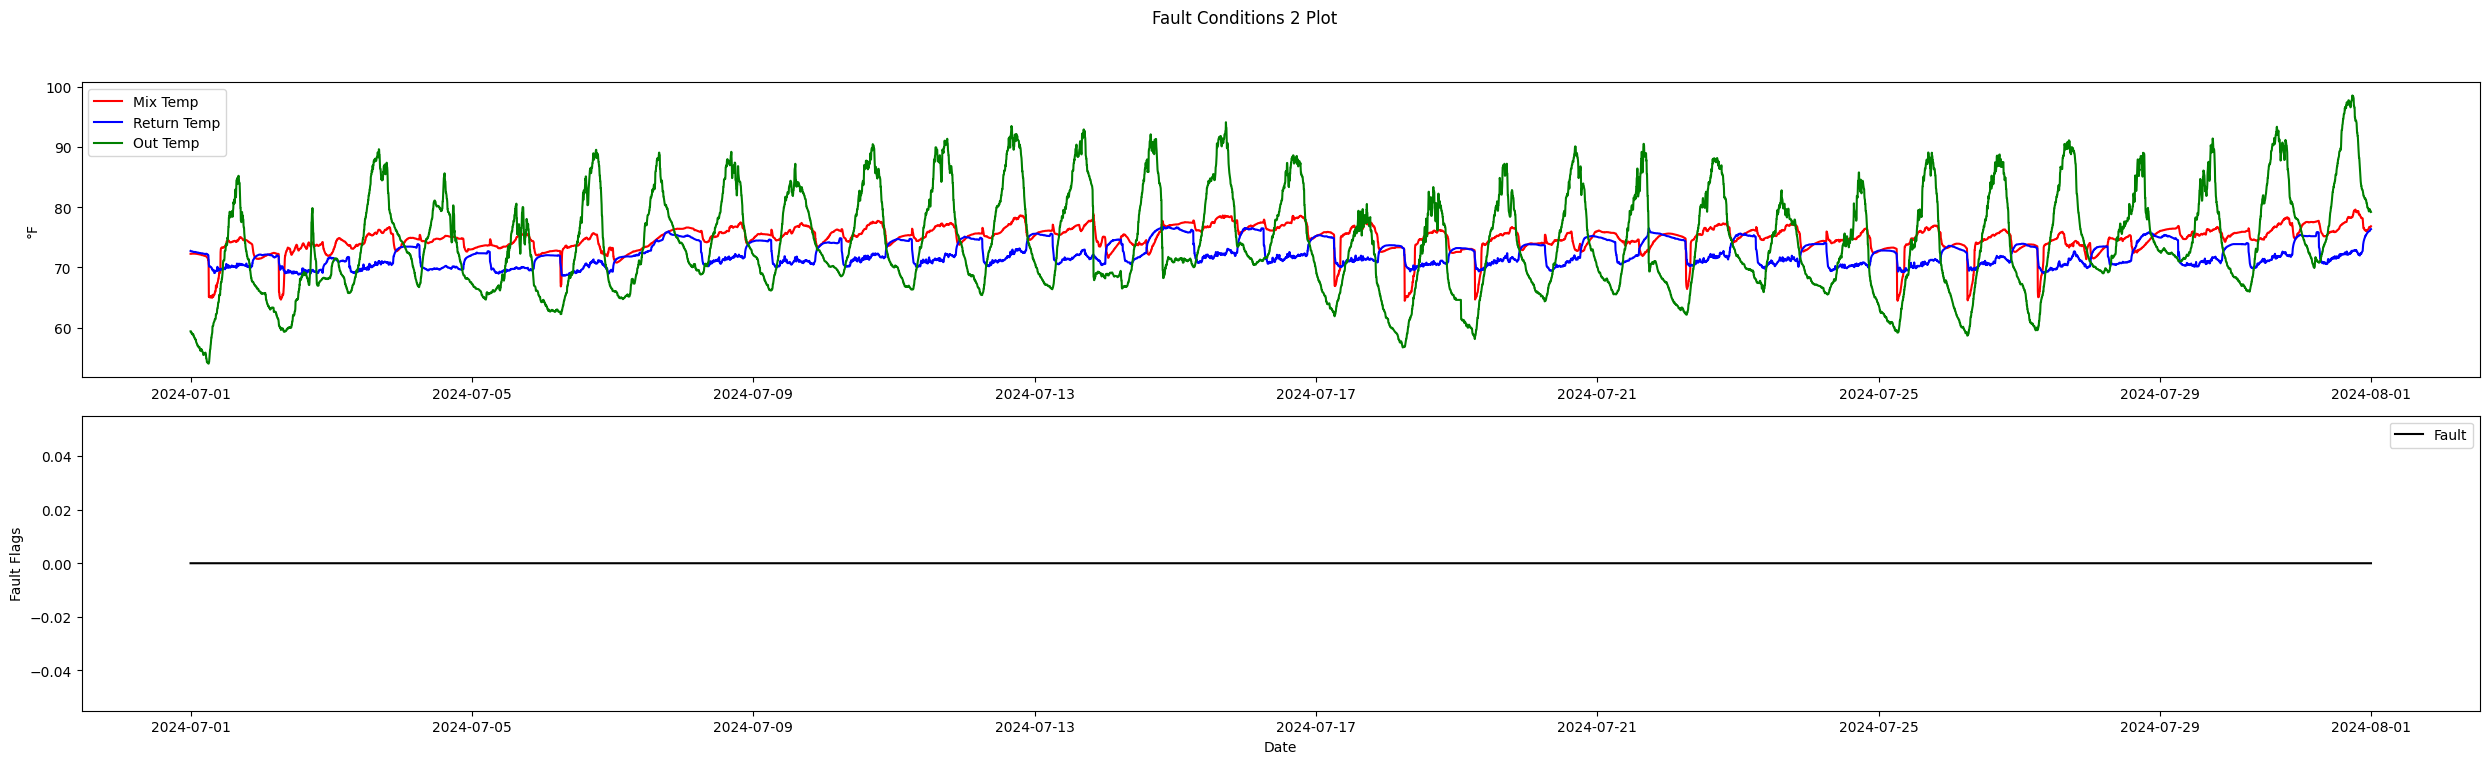

total days: 31.0
total hours: 744
hours fc2 mode: 0
percent true: 0.0
percent false: 100.0
flag true mat: nan
flag true oat: nan
flag true rat: nan
hours motor runtime: 434.5
Fault Flag Count:  0
NO FAULTS FOUND - Skipping time-of-day Histogram plot


In [16]:
from open_fdd.air_handling_unit.reports.report_fc2 import FaultCodeTwoReport

# Create an instance of FaultCodeFourReport
fc2_report = FaultCodeTwoReport(config_dict)
fc2_report.display_report_in_ipython(df_combined)

Fault Condition 3: Mix temperature too high; should be between outside and return air


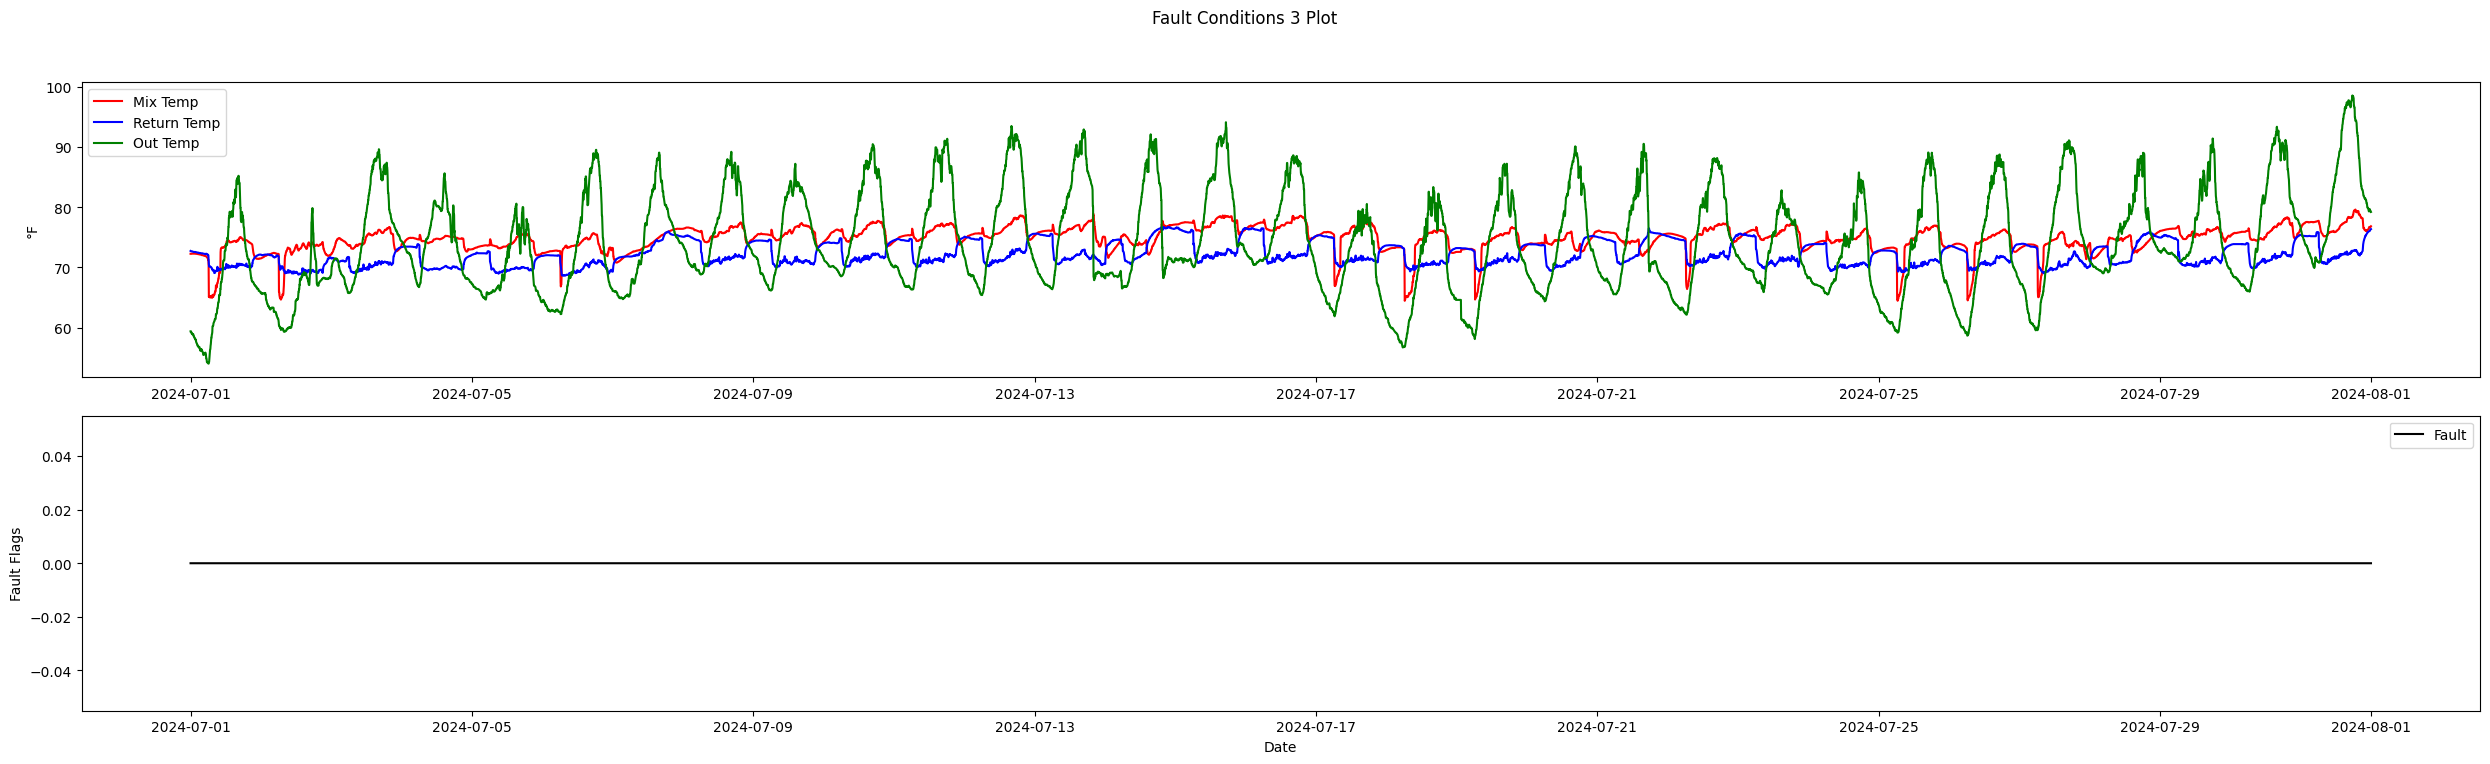

total days: 31.0
total hours: 744
hours fc3 mode: 0
percent true: 0.0
percent false: 100.0
flag true mat: nan
flag true oat: nan
flag true rat: nan
hours motor runtime: 434.5
Fault Flag Count:  0
NO FAULTS FOUND - Skipping time-of-day Histogram plot


In [17]:
from open_fdd.air_handling_unit.reports.report_fc3 import FaultCodeThreeReport

# Create an instance of FaultCodeFourReport
fc3_report = FaultCodeThreeReport(config_dict)
fc3_report.display_report_in_ipython(df_combined)


Fault Condition 4: Hunting too many OS state changes


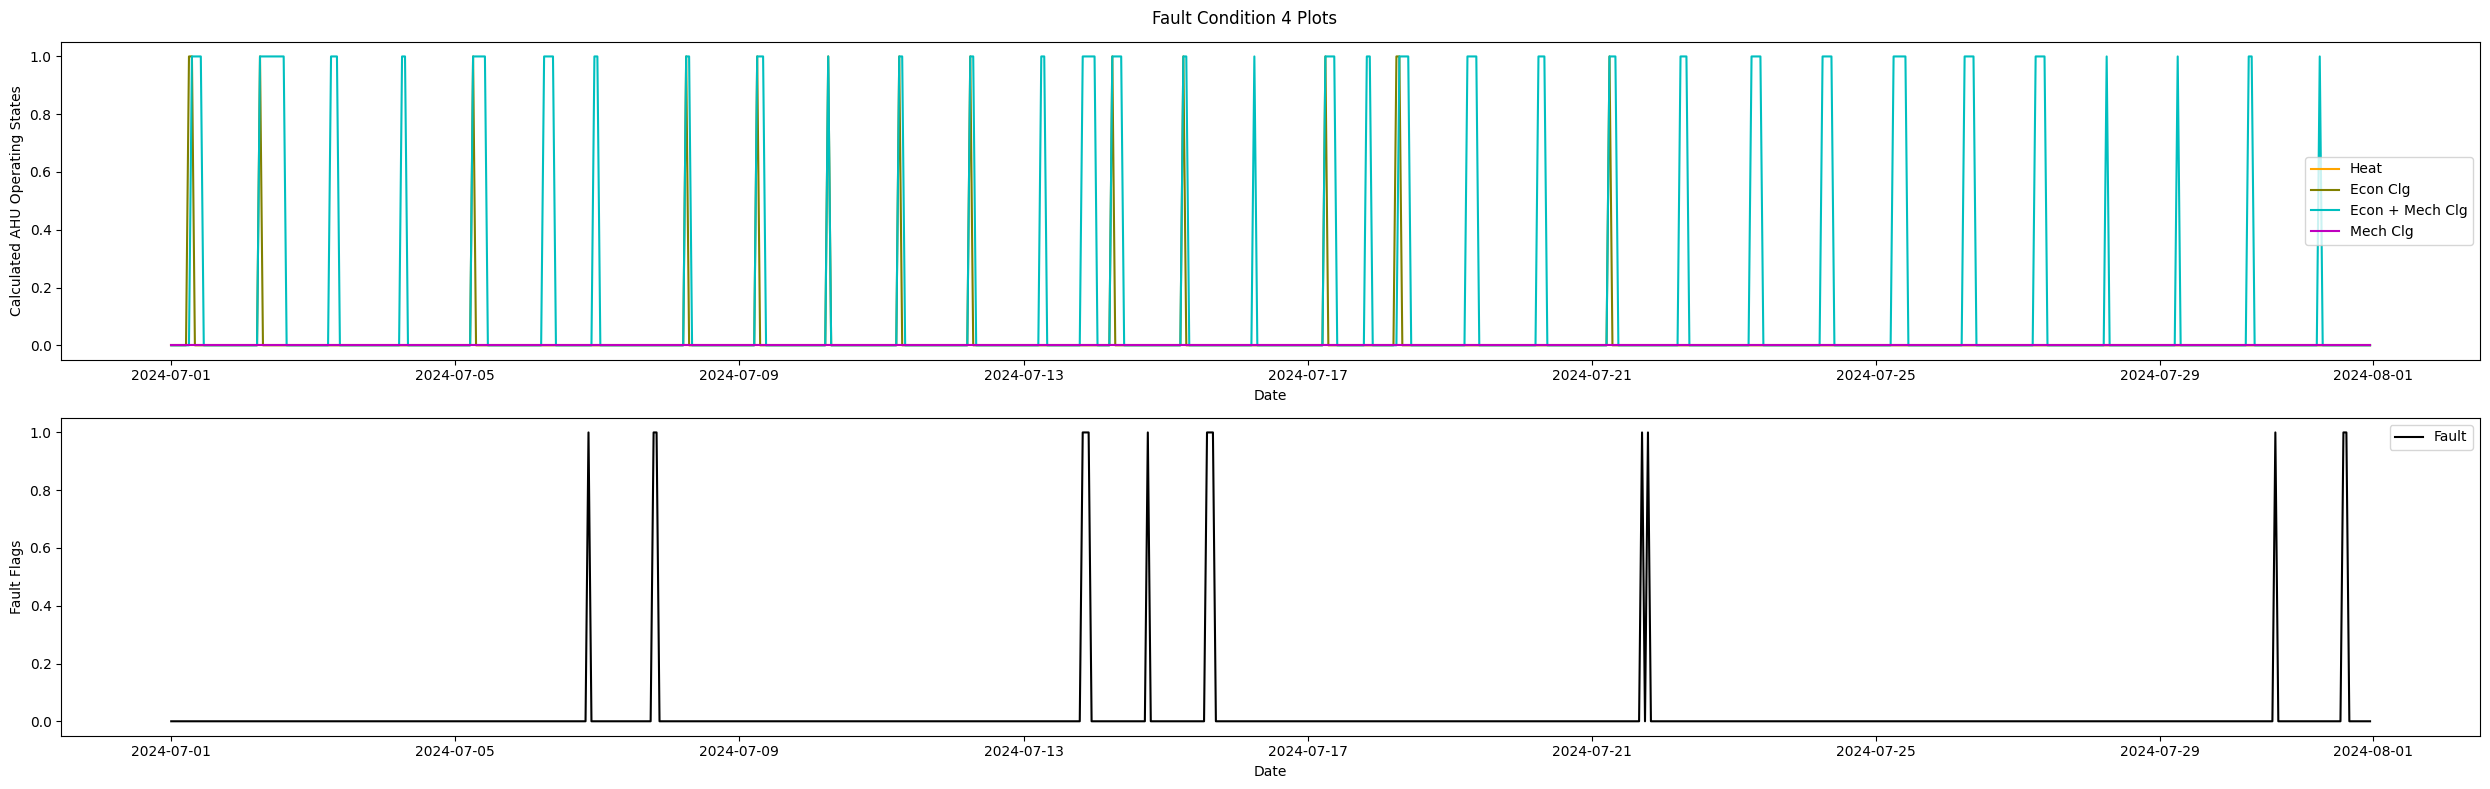

total days: 30.96
total hours: 743
hours in fault: 15
percent of time in fault: 2.02
percent of time not in fault: 97.98
percent of time AHU in mech clg mode: 0.0
percent of time AHU in econ plus mech clg mode: 13.71
percent of time AHU in econ free clg mode: 2.02
percent of time AHU in heating mode: 0.0
total hours heating mode: 0.0
total hours econ mode: 15.0
total hours econ mech clg mode: 102.0
total hours mech clg mode: 0.0
Fault Flag Count:  1

Time-of-day Histogram Data
timestamp
2024-07-06 21:00:00    21.0
2024-07-07 19:00:00    19.0
2024-07-07 20:00:00    20.0
2024-07-13 20:00:00    20.0
2024-07-13 21:00:00    21.0
2024-07-13 22:00:00    22.0
2024-07-14 18:00:00    18.0
2024-07-15 14:00:00    14.0
2024-07-15 15:00:00    15.0
2024-07-15 16:00:00    16.0
2024-07-21 17:00:00    17.0
2024-07-21 19:00:00    19.0
2024-07-30 15:00:00    15.0
2024-07-31 14:00:00    14.0
2024-07-31 15:00:00    15.0
Name: hour_of_the_day, dtype: float64



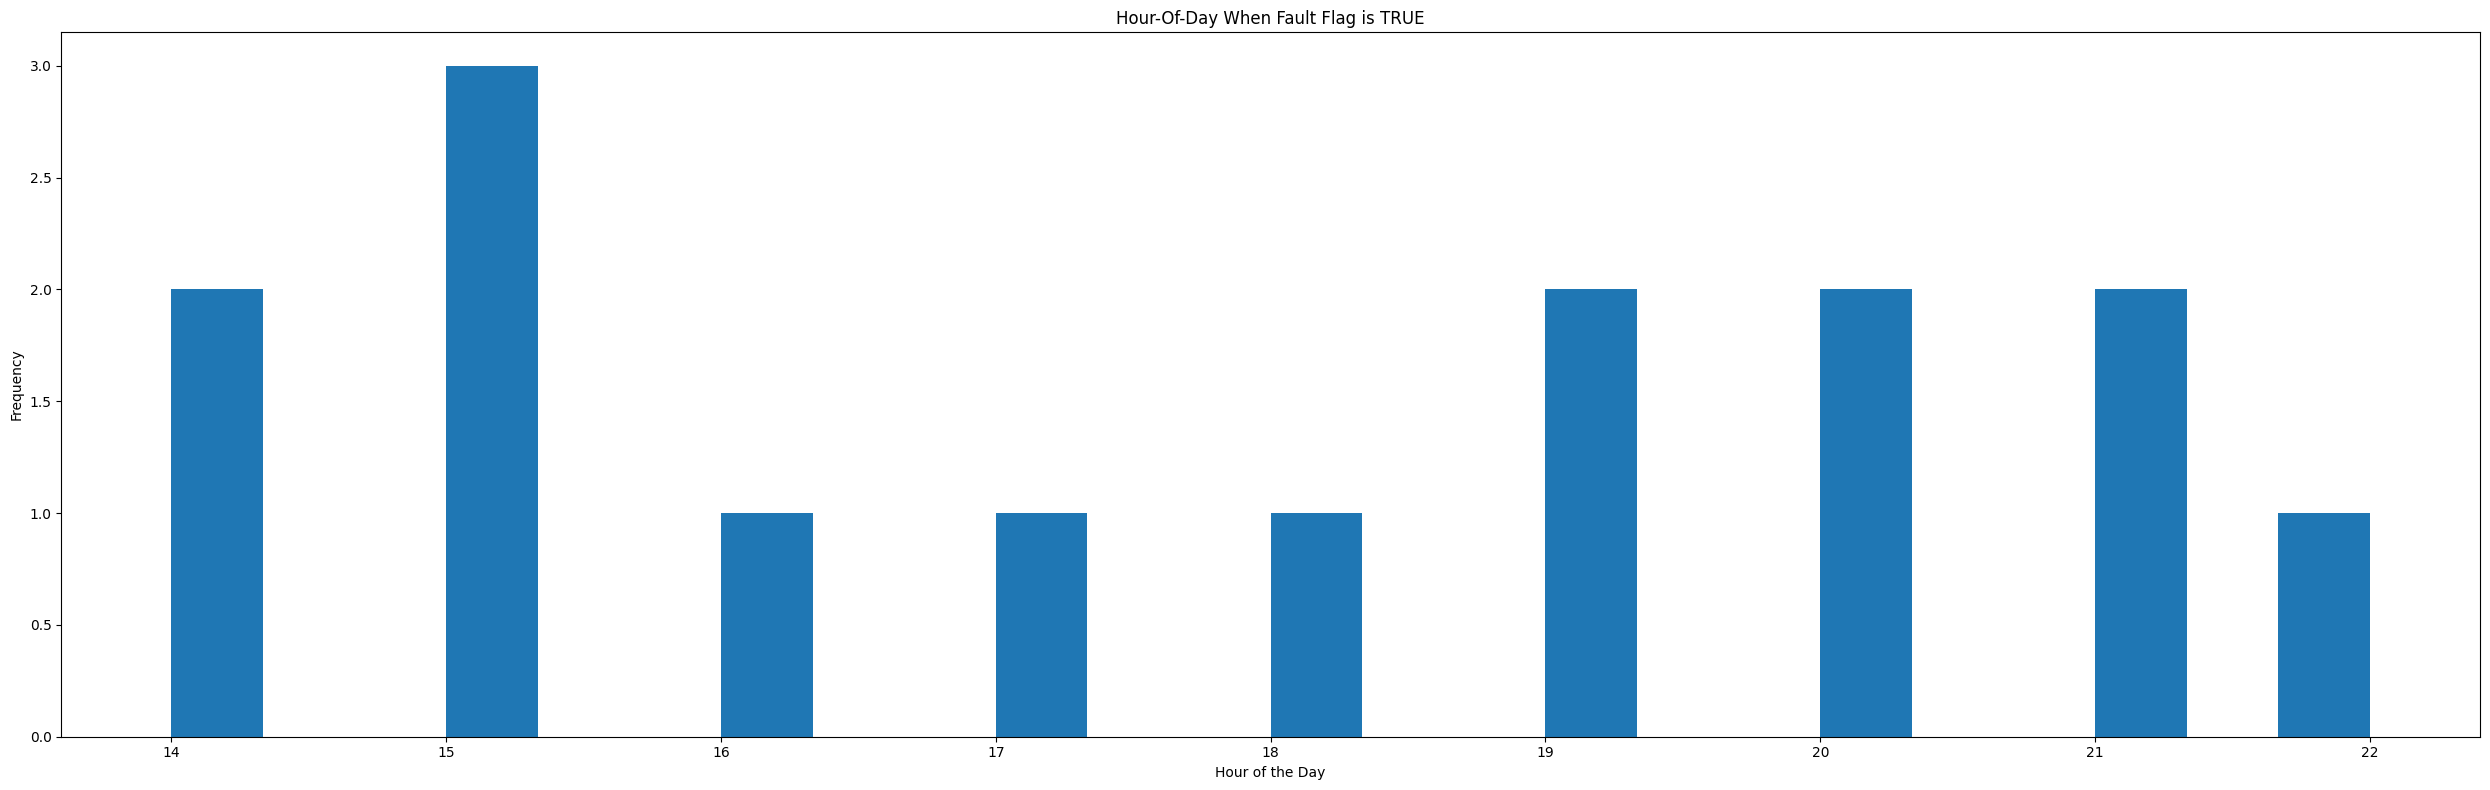

In [18]:

from open_fdd.air_handling_unit.reports.report_fc4 import FaultCodeFourReport

# Create an instance of FaultCodeFourReport
fc4_report = FaultCodeFourReport(config_dict)
fc4_report.display_report_in_ipython(df_fc4)

Fault Condition 5: Supply air temperature too low; should be higher than mix air


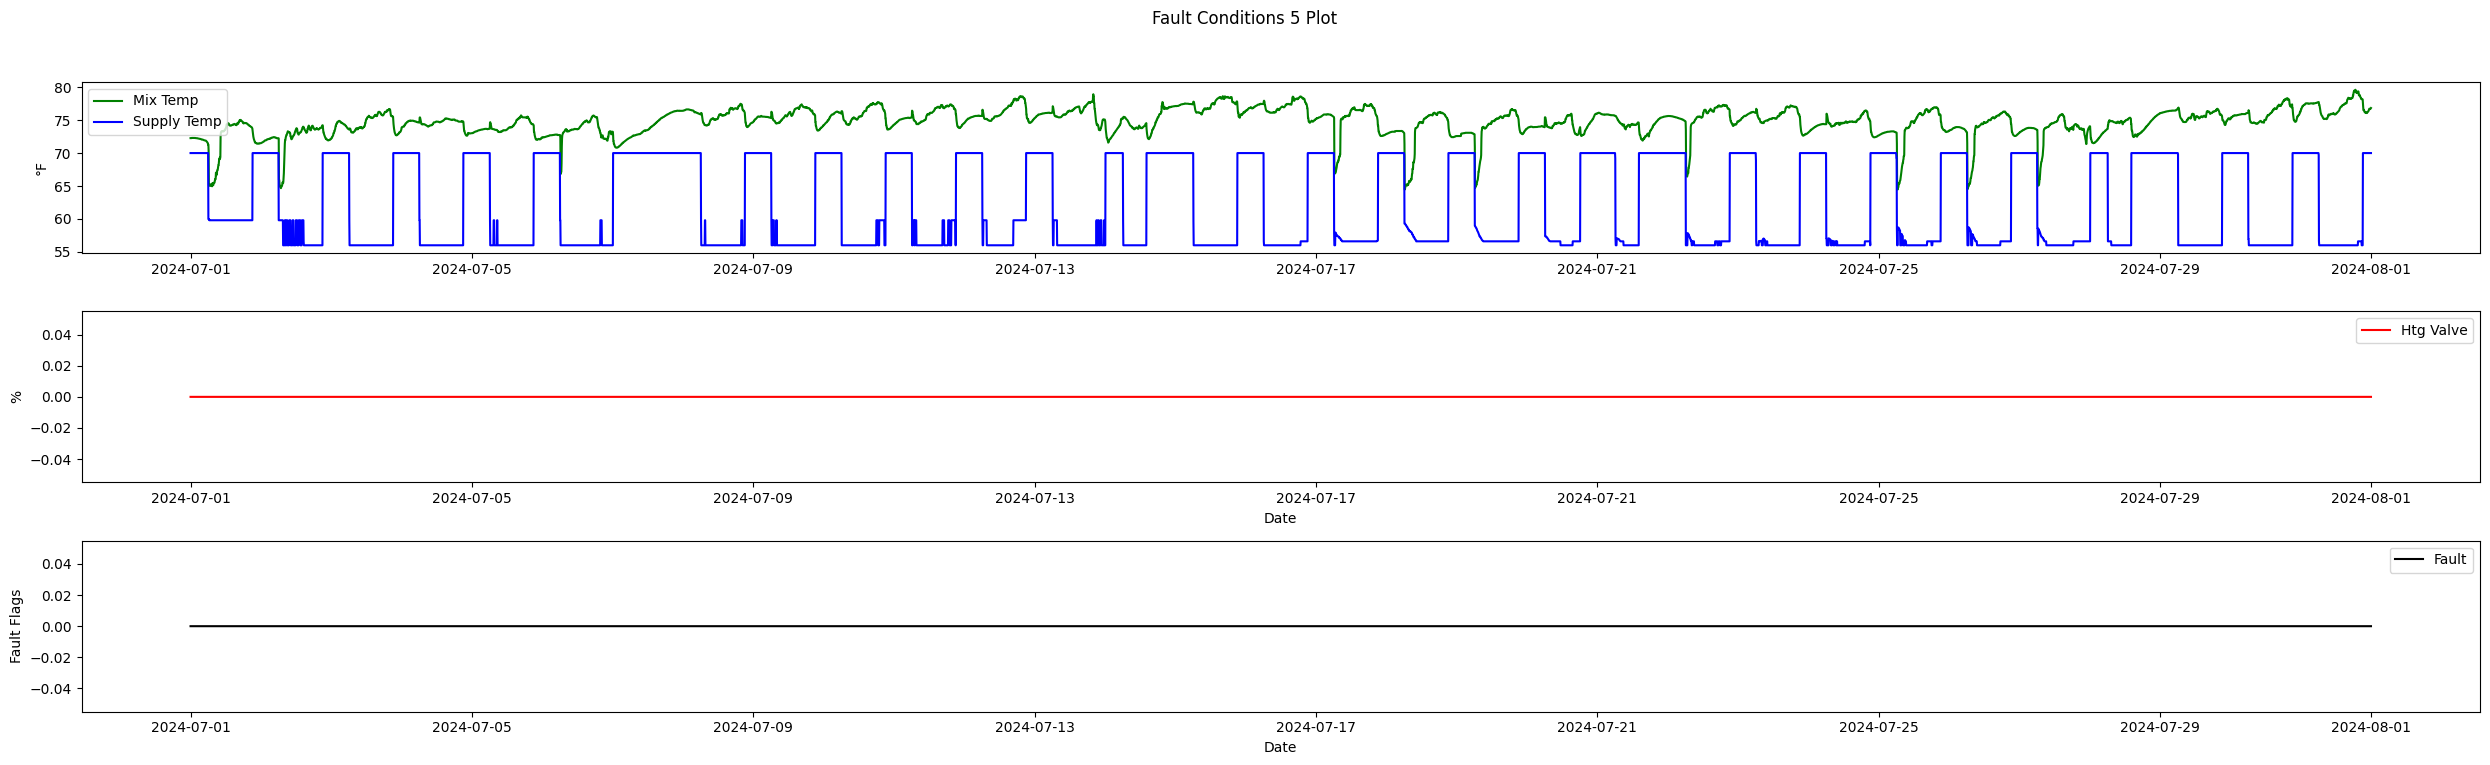

total days: 31.0
total hours: 744
hours fc5 mode: 0
percent true: 0.0
percent false: 100.0
flag true mat: nan
flag true sat: nan
hours motor runtime: 434.5
Fault Flag Count:  0
NO FAULTS FOUND - Skipping time-of-day Histogram plot


In [19]:
from open_fdd.air_handling_unit.reports.report_fc5 import FaultCodeFiveReport

# Create an instance of FaultCodeFourReport
fc5_report = FaultCodeFiveReport(config_dict)
fc5_report.display_report_in_ipython(df_combined)

Fault Condition 7: Supply air temperature too low in full heating mode


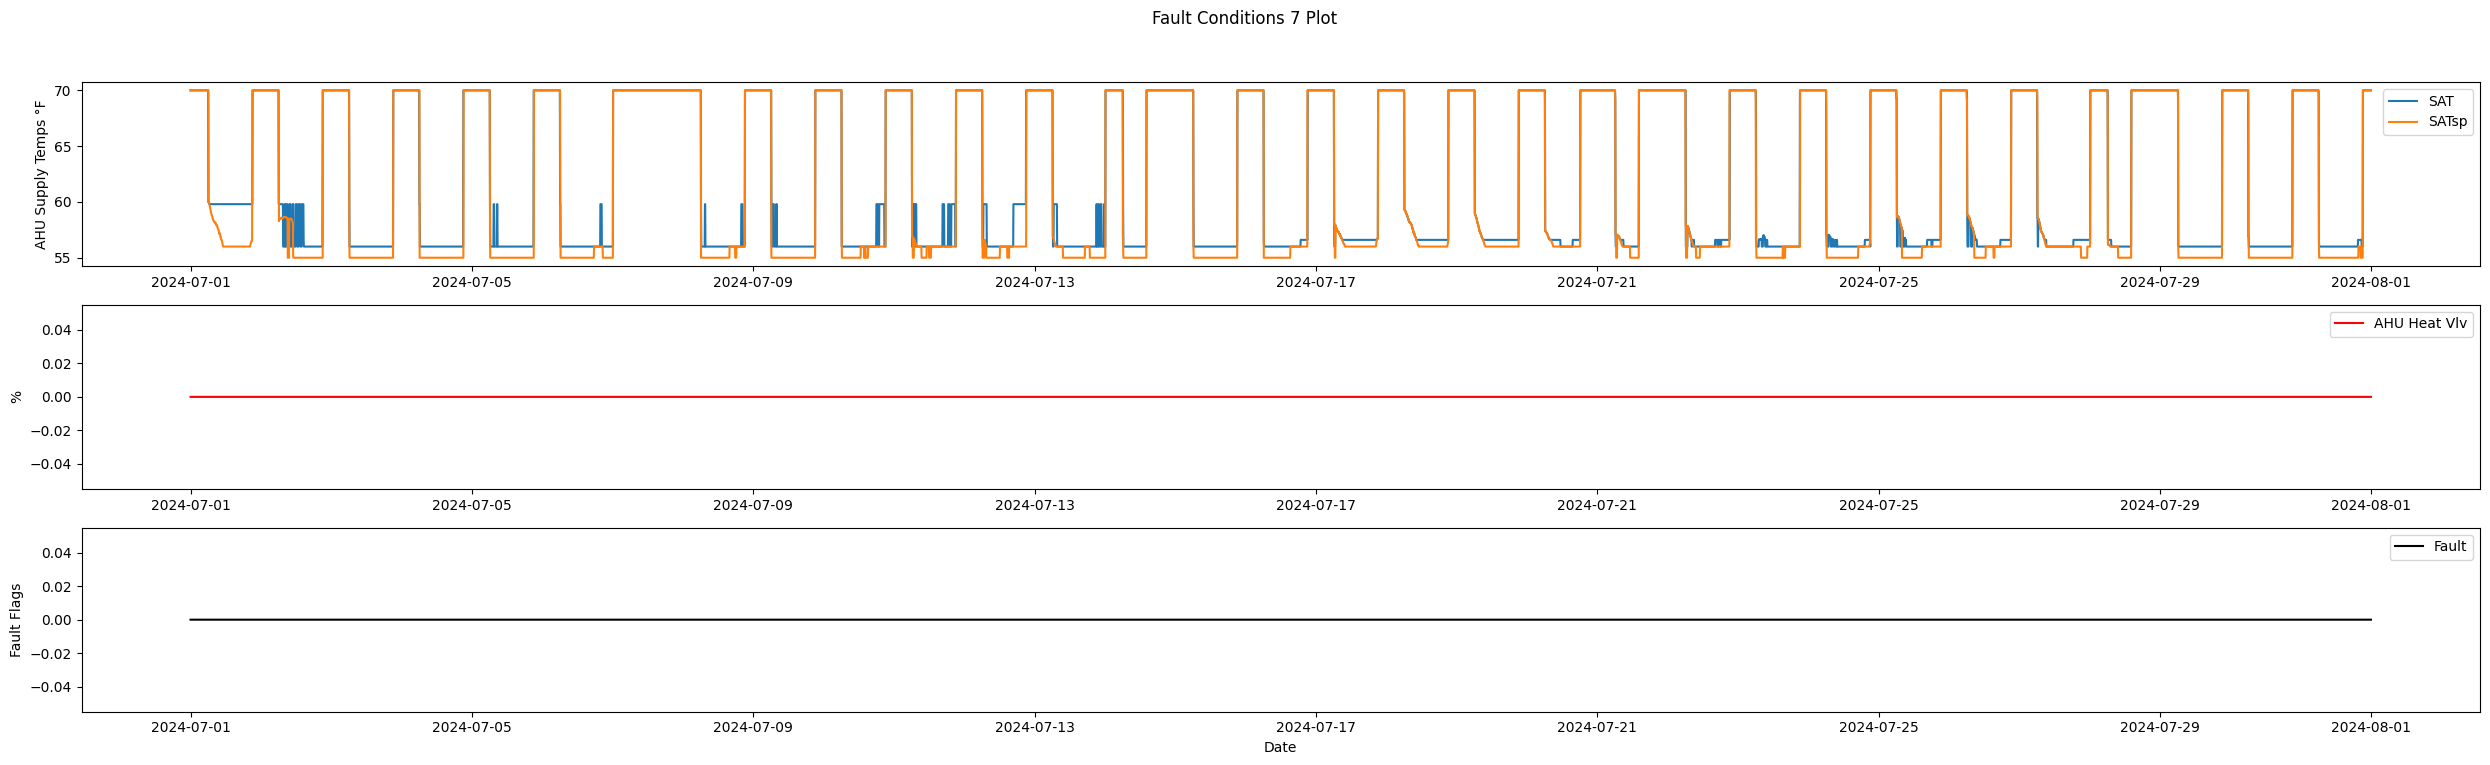

total days: 31.0
total hours: 744
hours fc7 mode: 0
percent true: 0.0
percent false: 100.0
flag true satsp: nan
flag true sat: nan
hours motor runtime: 434.5
Fault Flag Count:  0
NO FAULTS FOUND - Skipping time-of-day Histogram plot


In [20]:
from open_fdd.air_handling_unit.reports.report_fc7 import FaultCodeSevenReport

# Create an instance of FaultCodeFourReport
fc7_report = FaultCodeSevenReport(config_dict)
fc7_report.display_report_in_ipython(df_combined)


Fault Condition 8: Supply air temperature and mix air temperature should be approximately equal in economizer mode


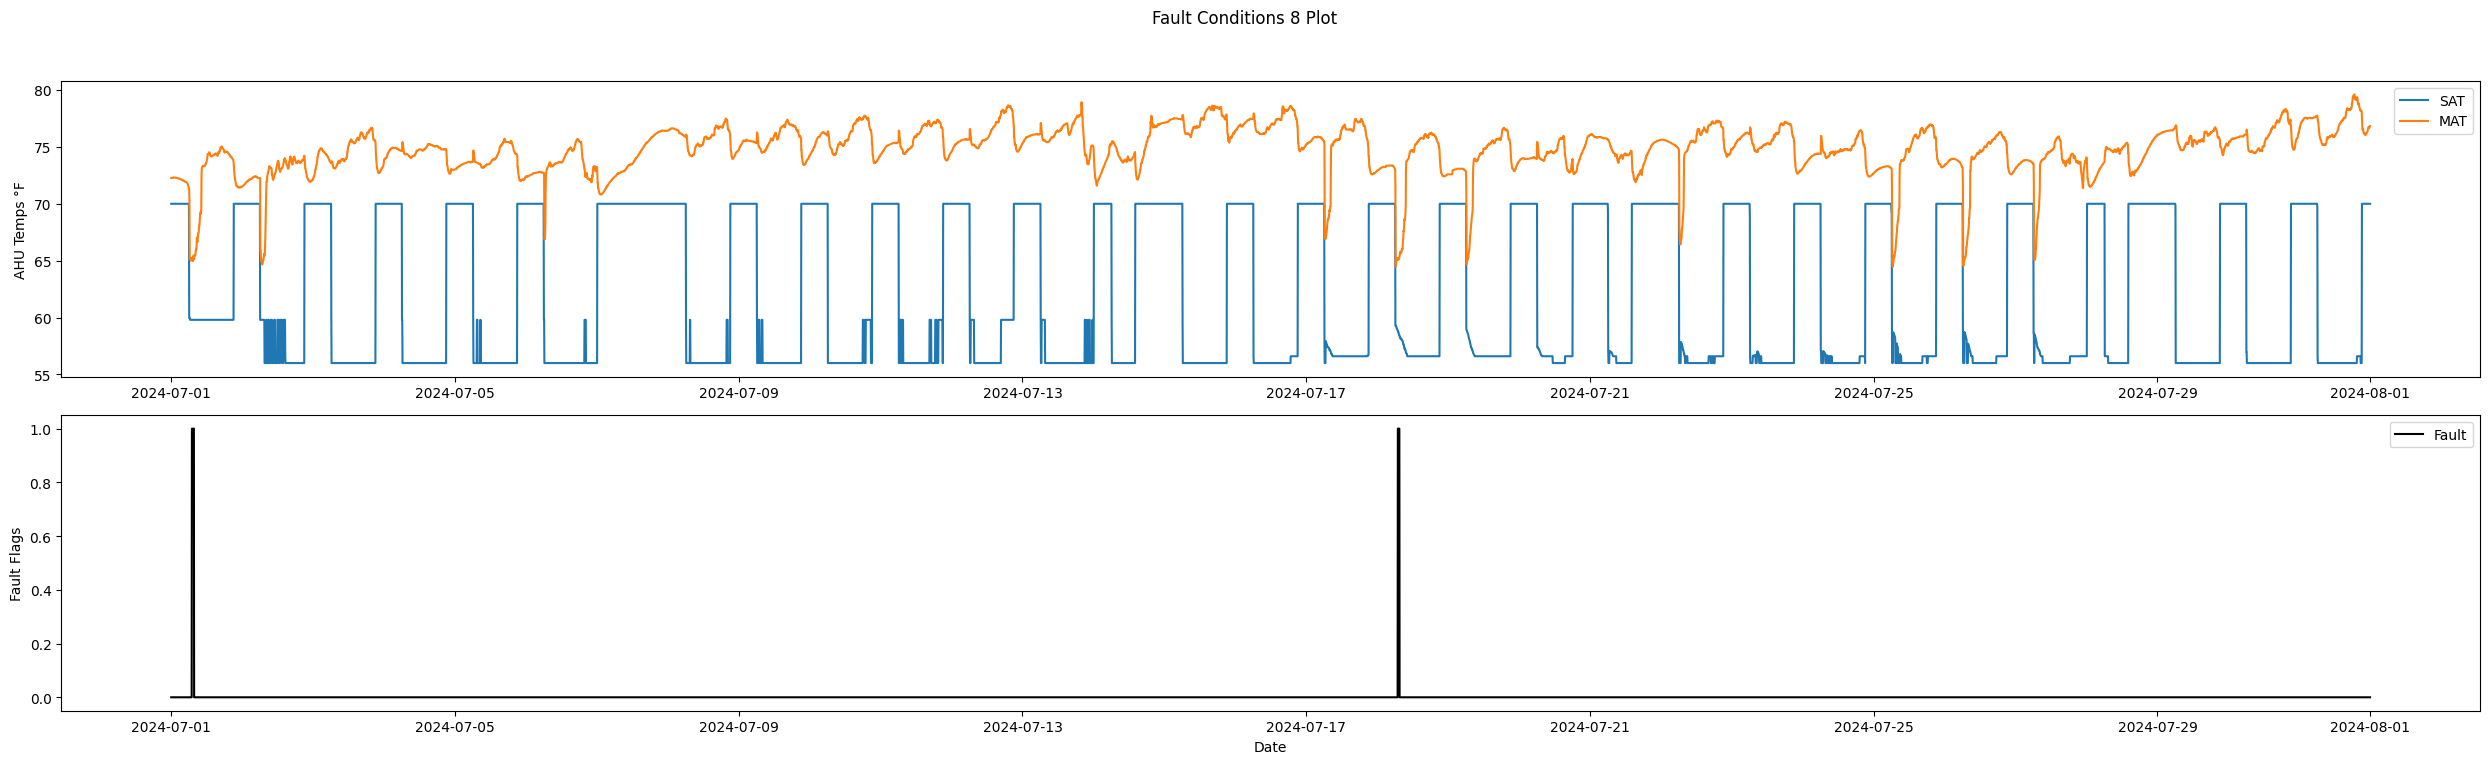

total days: 31.0
total hours: 744
hours fc8 mode: 1
percent true: 0.18
percent false: 99.82
flag true mat: 65.21
flag true sat: 59.29
hours motor runtime: 434.5
Fault Flag Count:  1


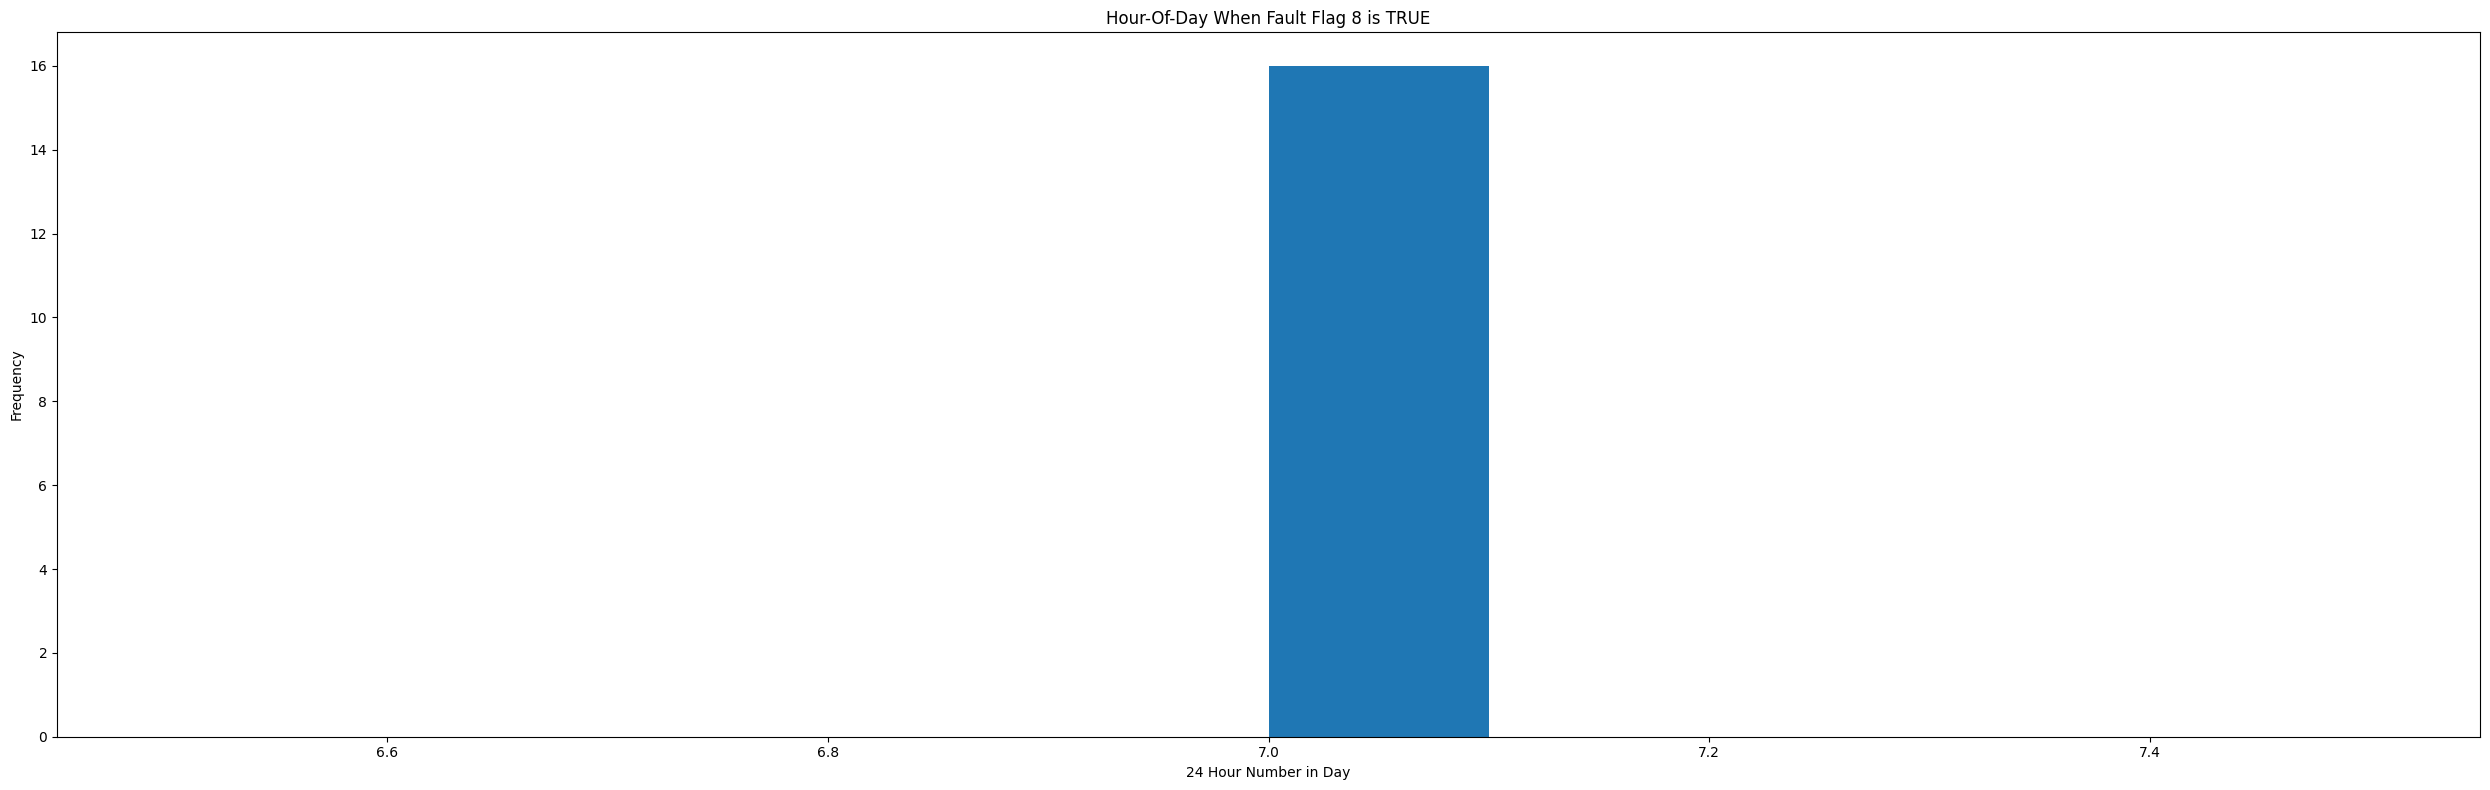

Mix Air Temp Mean When In Fault:  65.21
Supply Air Temp Mean When In Fault:  59.29
The percent True metric that represents the amount of time for when the fault flag is True is low, indicating the AHU components are within calibration for this fault equation.


In [21]:
from open_fdd.air_handling_unit.reports.report_fc8 import FaultCodeEightReport

# Create an instance of FaultCodeFourReport
fc8_report = FaultCodeEightReport(config_dict)
fc8_report.display_report_in_ipython(df_combined)

Fault Condition 9: Outside air temperature too high in free cooling without additional mechanical cooling in economizer mode


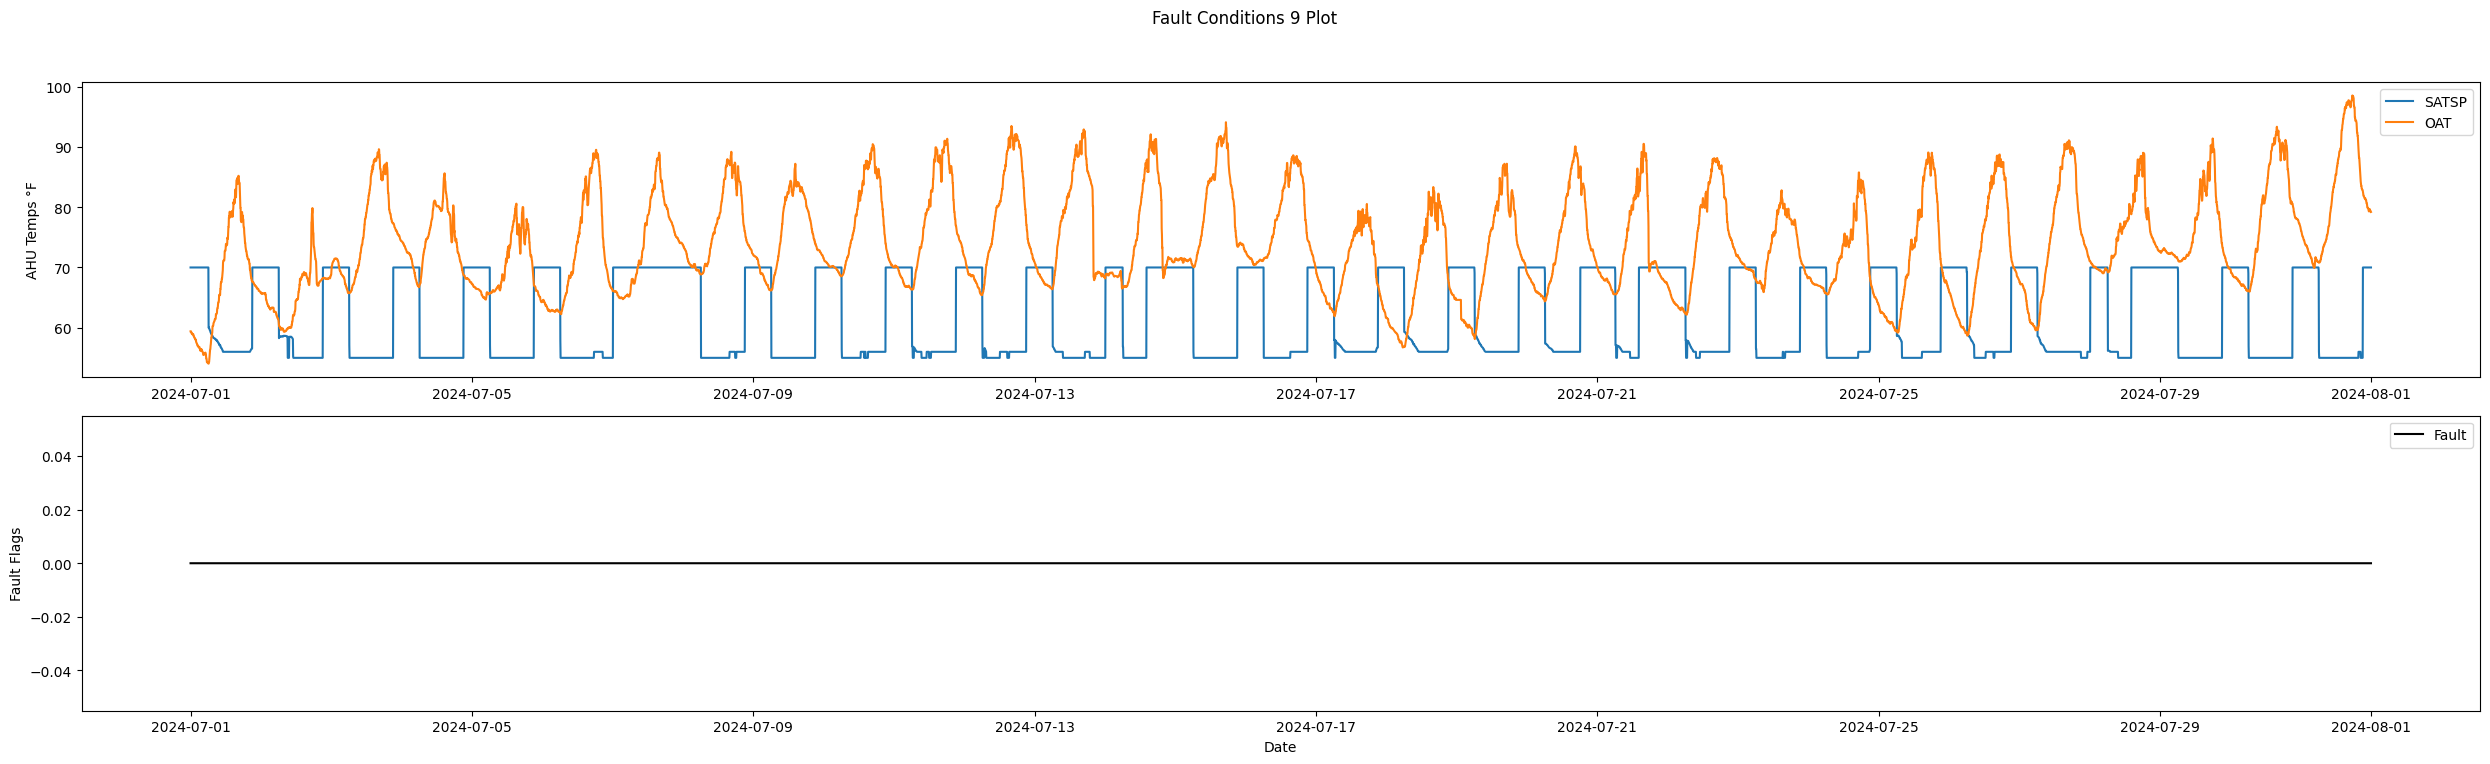

total days: 31.0
total hours: 744
hours fc9 mode: 0
percent true: 0.0
percent false: 100.0
flag true oat: nan
flag true satsp: nan
hours motor runtime: 434.5
Fault Flag Count:  0
NO FAULTS FOUND - Skipping time-of-day Histogram plot


In [22]:
from open_fdd.air_handling_unit.reports.report_fc9 import FaultCodeNineReport

# Create an instance of FaultCodeFourReport
fc9_report = FaultCodeNineReport(config_dict)
fc9_report.display_report_in_ipython(df_combined)

Fault Condition 10: Outdoor air temperature and mix air temperature should be approximately equal in economizer plus mech cooling mode


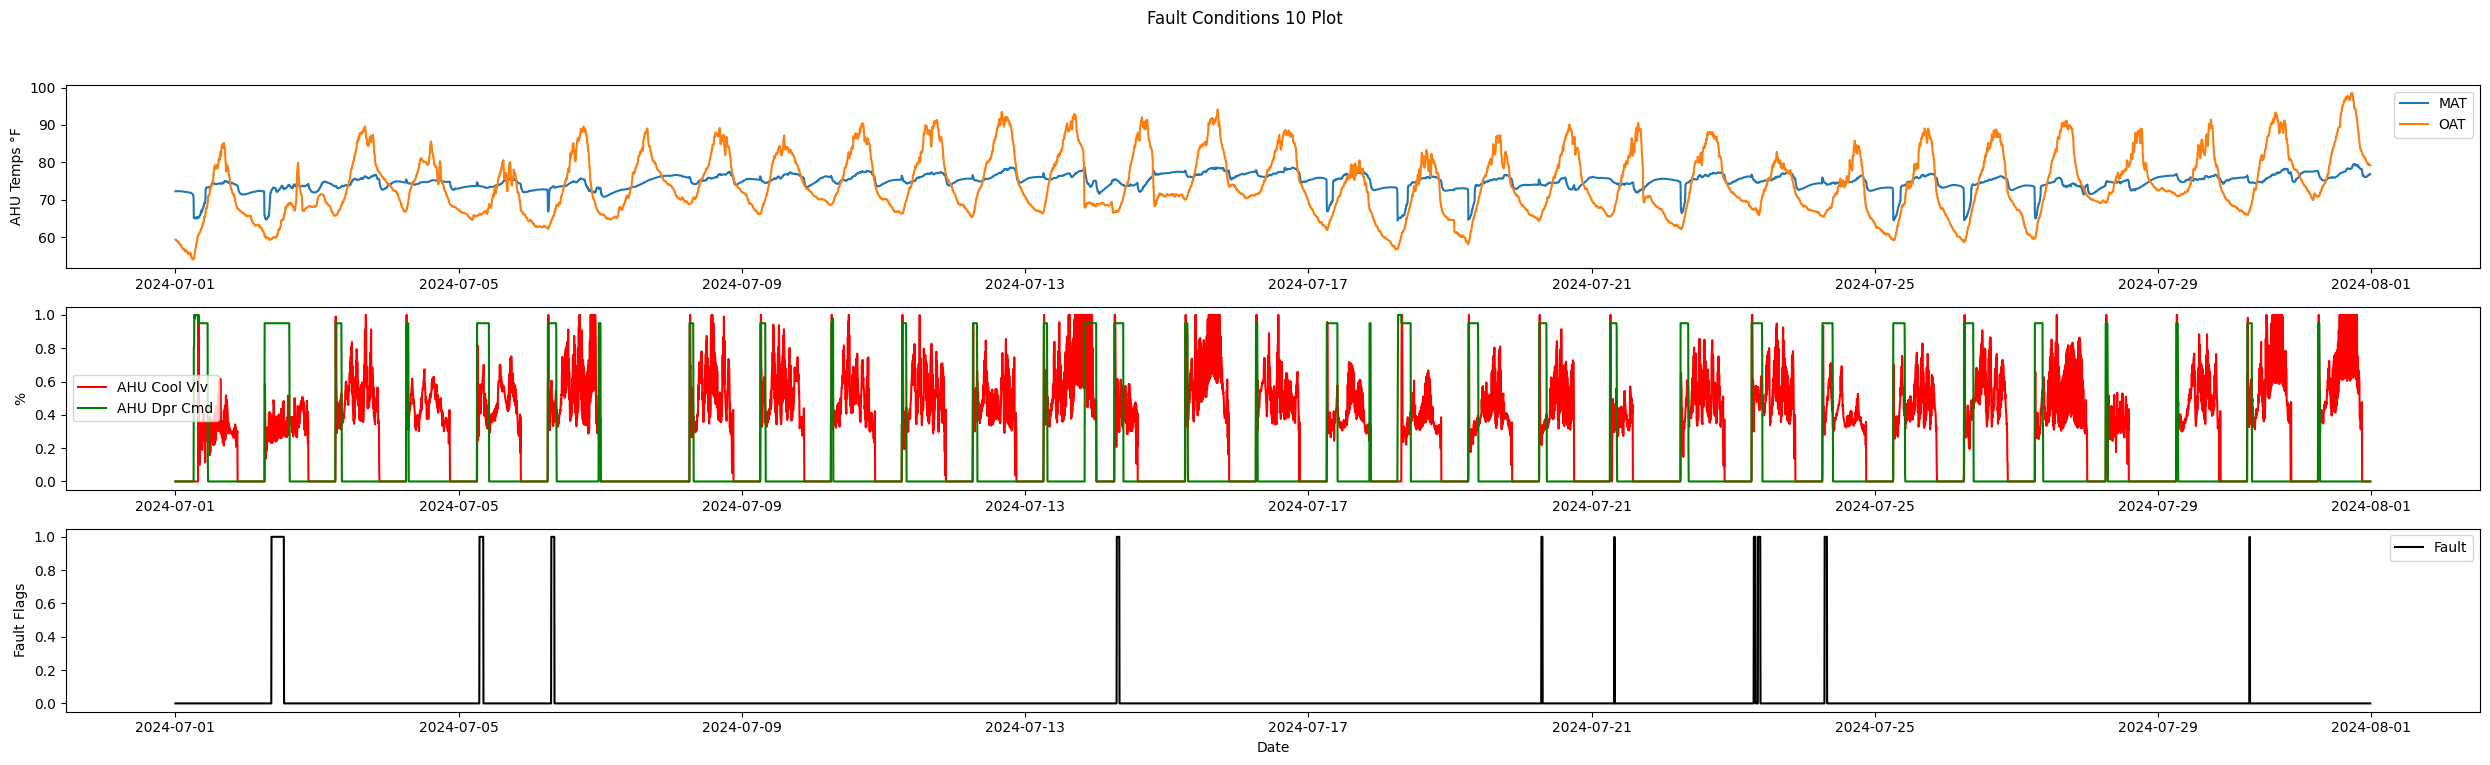

total days: 31.0
total hours: 744
hours fc10 mode: 10
percent true: 1.42
percent false: 98.58
flag true oat: 64.48
flag true mat: 73.72
hours motor runtime: 434.5
Fault Flag Count:  1


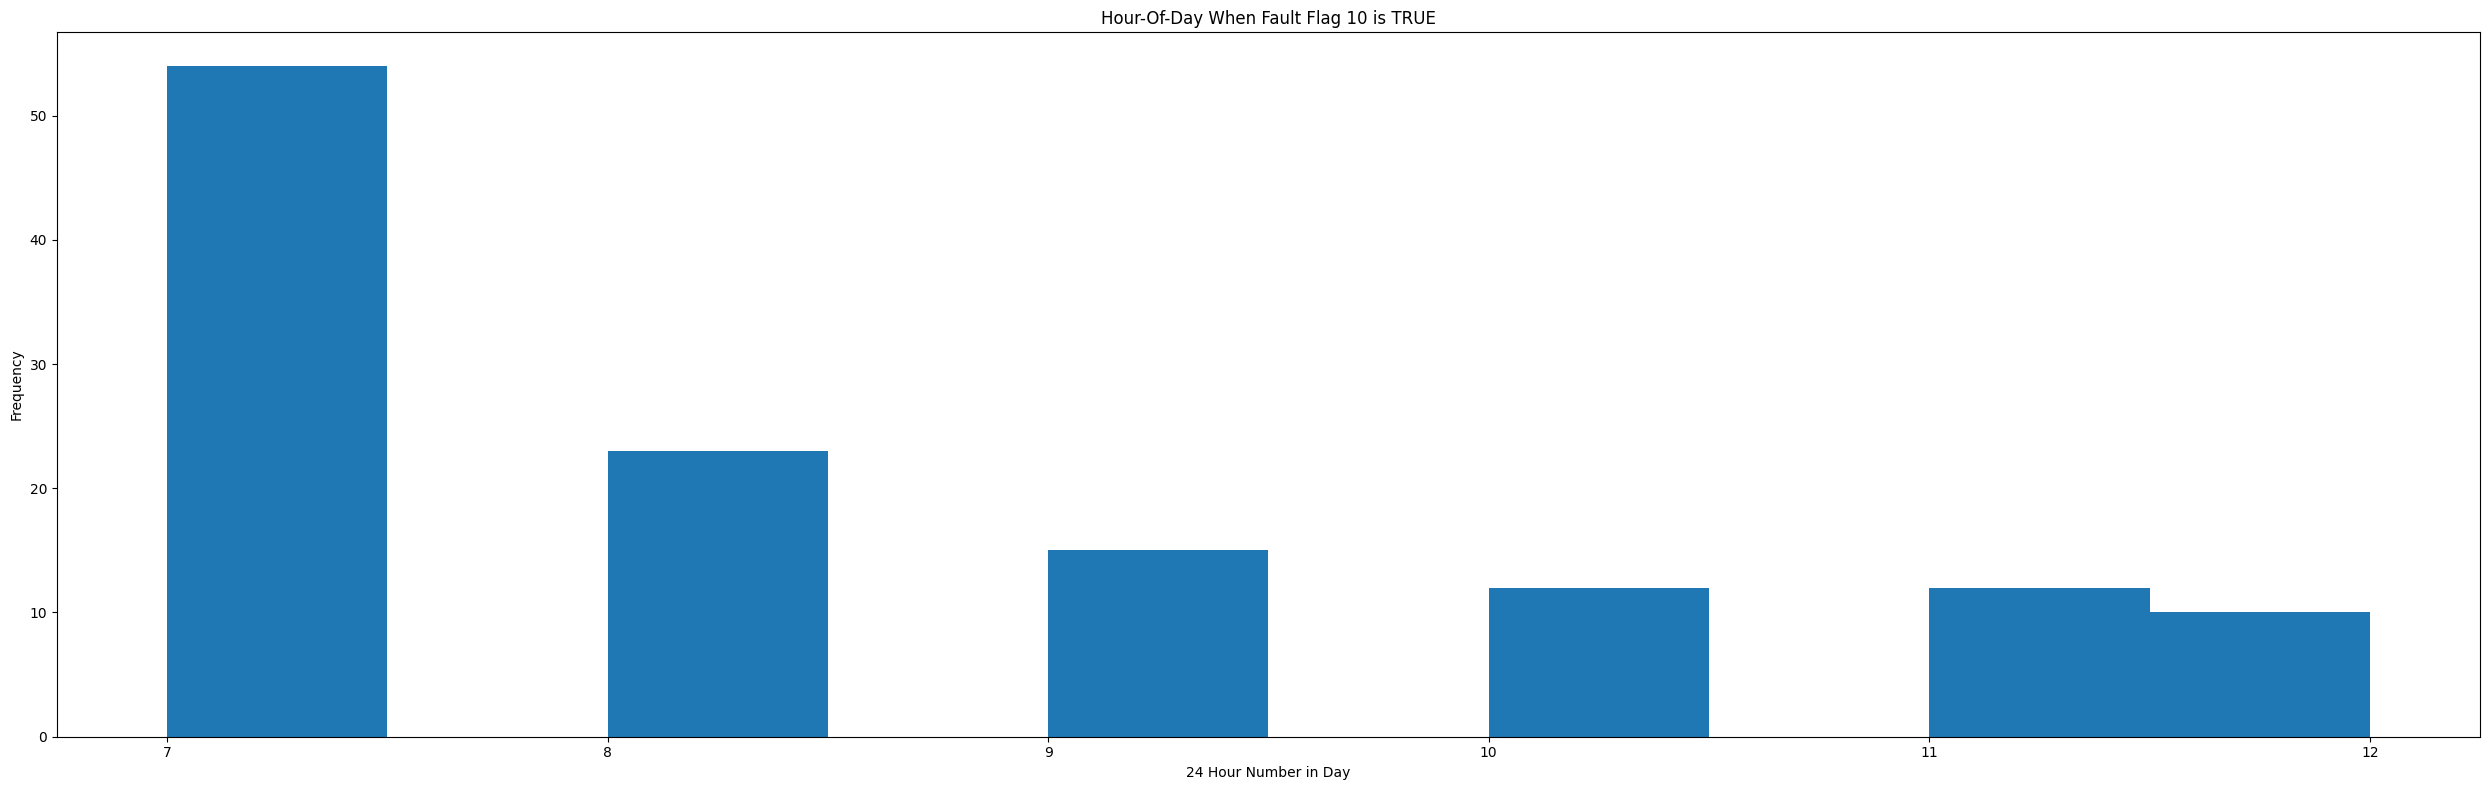

Outside Air Temp Mean When In Fault:  64.48
Mix Air Temp Mean When In Fault:  73.72
The percent True metric that represents the amount of time for when the fault flag is True is low indicating the AHU components are within calibration for this fault equation.


In [23]:
from open_fdd.air_handling_unit.reports.report_fc10 import FaultCodeTenReport

# Create an instance of FaultCodeFourReport
fc10_report = FaultCodeTenReport(config_dict)
fc10_report.display_report_in_ipython(df_combined)

Fault Condition 11: Outside air temperature too low for 100% outside air cooling in economizer mode


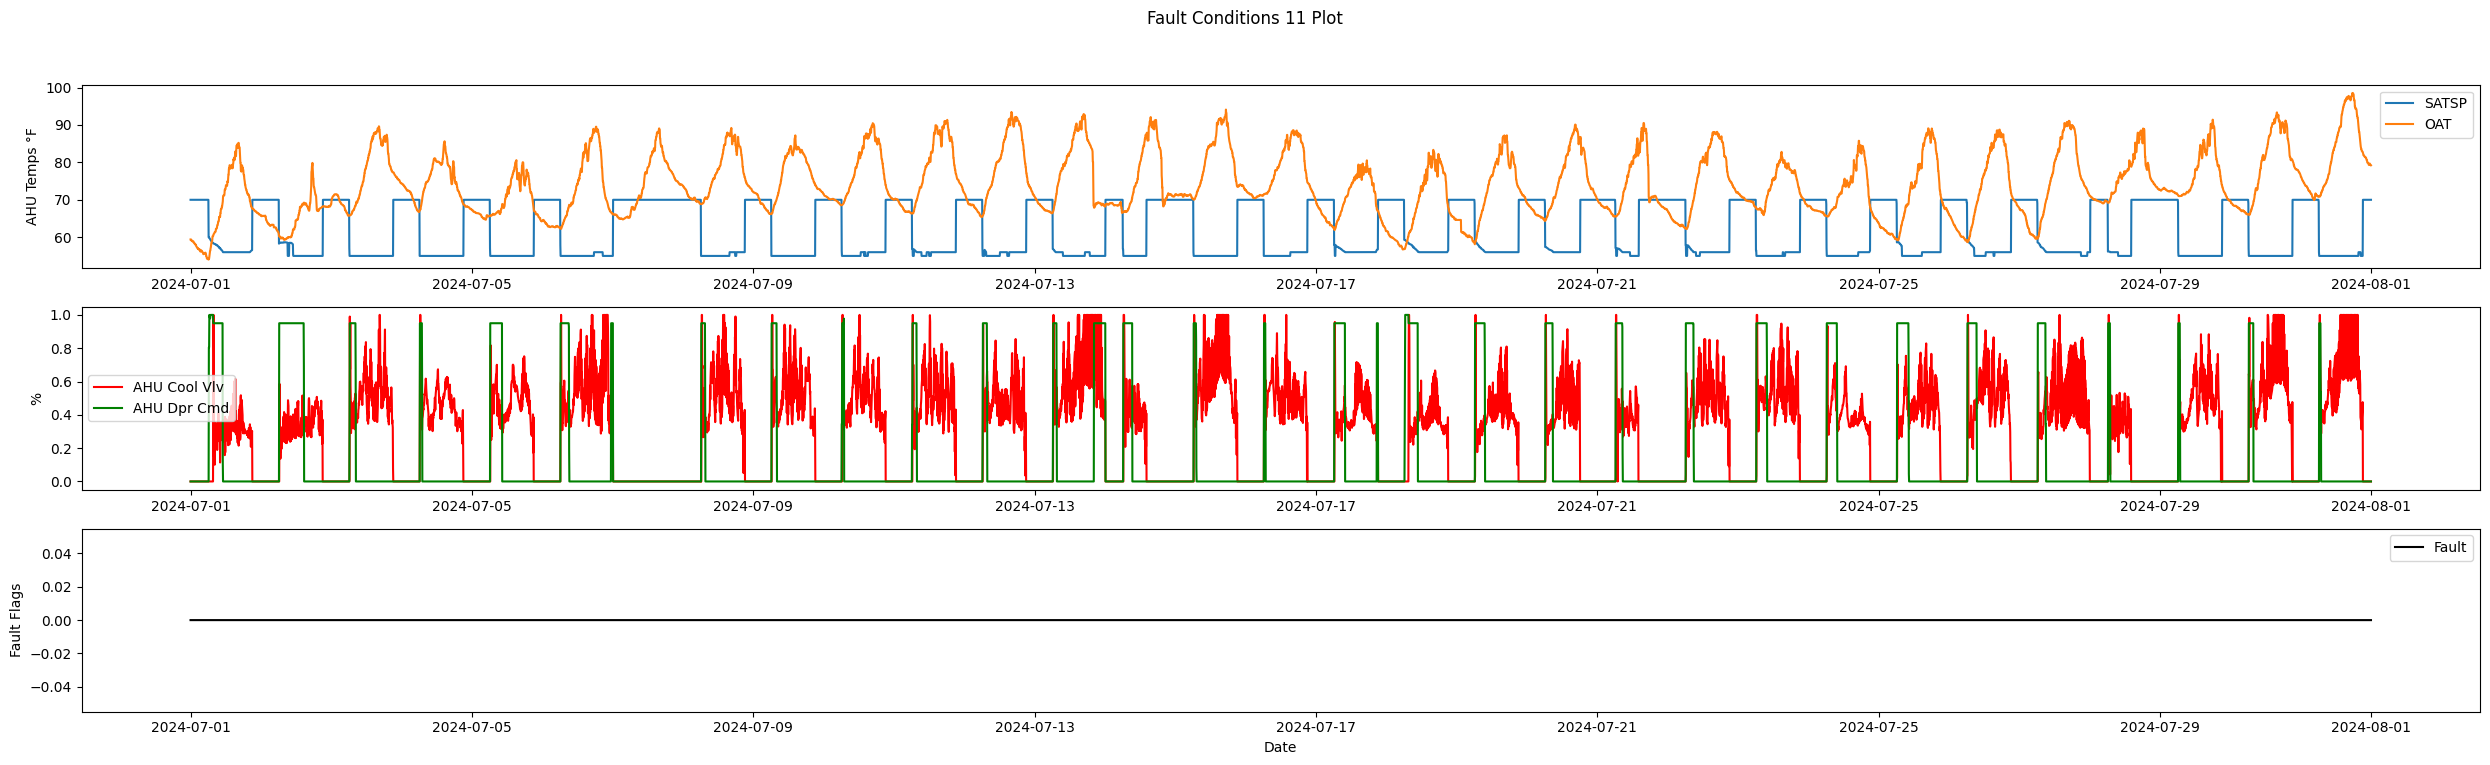

total days: 31.0
total hours: 744
hours fc11 mode: 0
percent true: 0.0
percent false: 100.0
flag true oat: nan
flag true sat sp: nan
hours motor runtime: 434.5
Fault Flag Count:  0
NO FAULTS FOUND - Skipping time-of-day Histogram plot


In [24]:
from open_fdd.air_handling_unit.reports.report_fc11 import FaultCodeElevenReport

# Create an instance of FaultCodeFourReport
fc11_report = FaultCodeElevenReport(config_dict)
fc11_report.display_report_in_ipython(df_combined)

Fault Condition 12: Supply air temperature too high; should be less than mix air temperature in economizer plus mech cooling mode


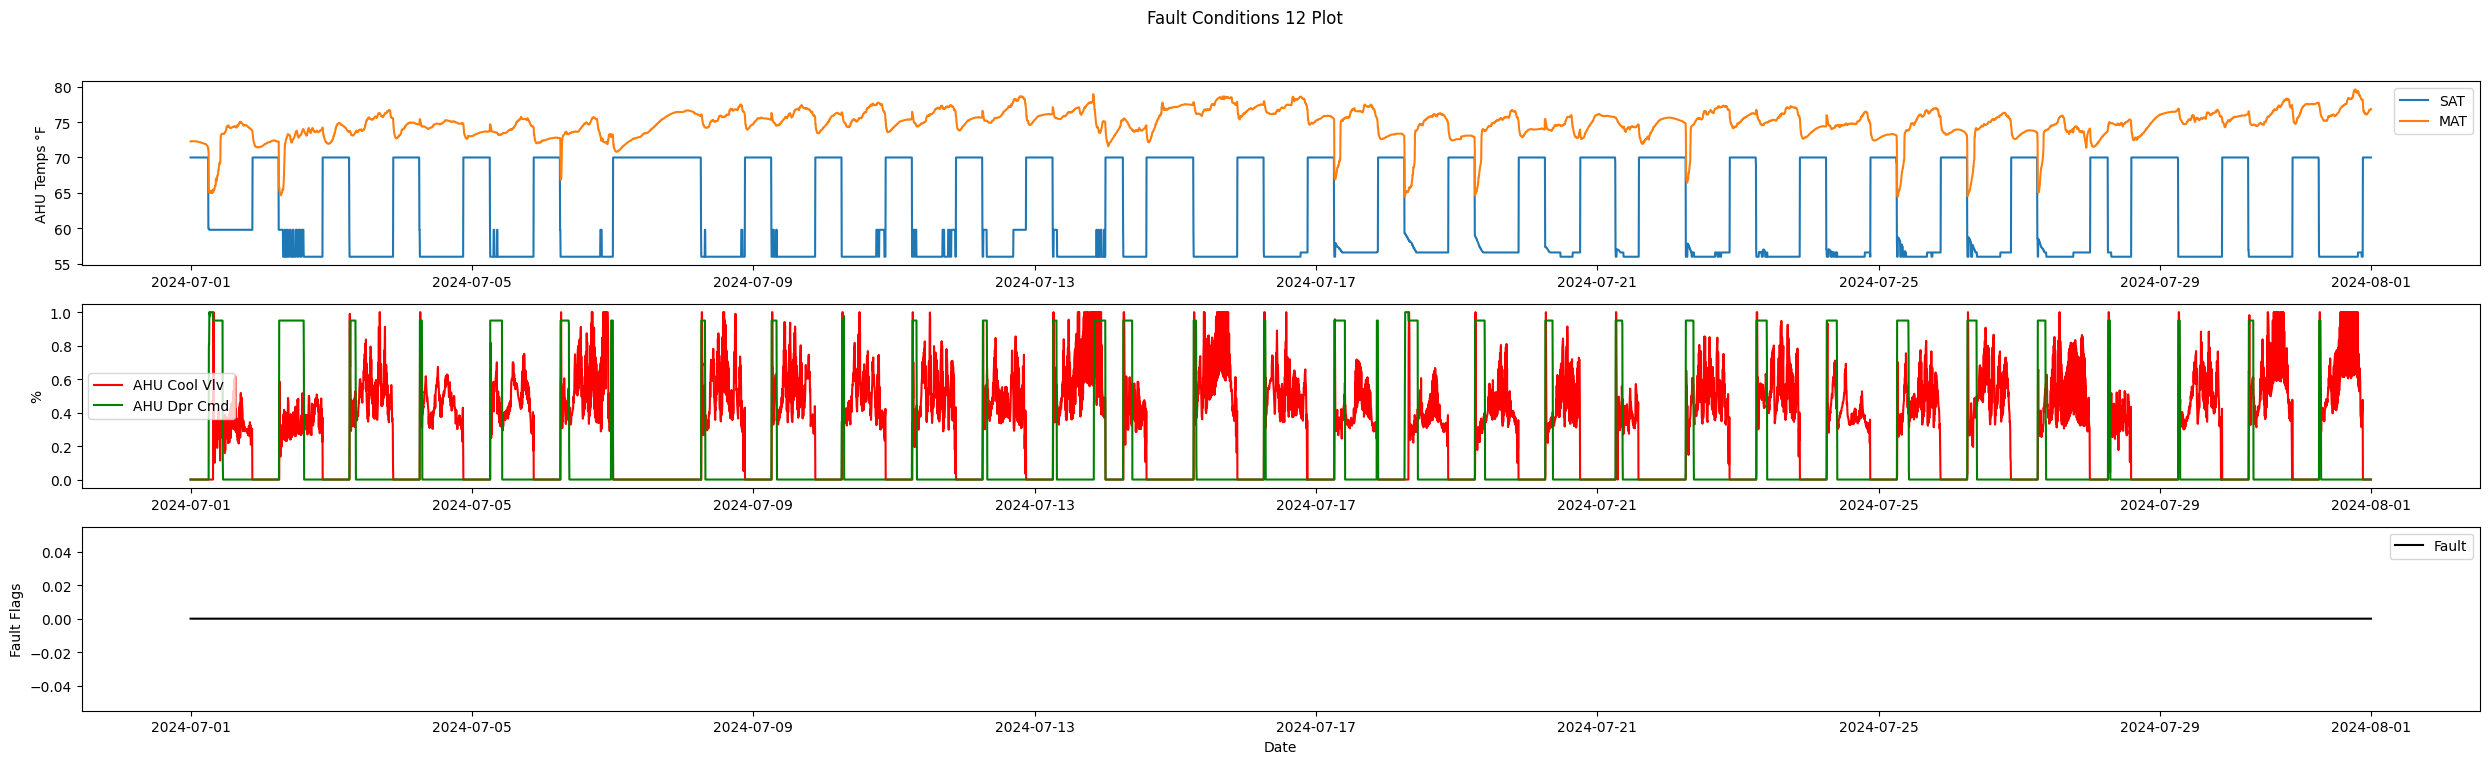

total days: 31.0
total hours: 744
hours fc12 mode: 0
percent true: 0.0
percent false: 100.0
flag true mat: nan
flag true sat: nan
hours motor runtime: 434.5
Fault Flag Count:  0
NO FAULTS FOUND - Skipping time-of-day Histogram plot


In [25]:
from open_fdd.air_handling_unit.reports.report_fc12 import FaultCodeTwelveReport

# Create an instance of FaultCodeFourReport
fc12_report = FaultCodeTwelveReport(config_dict)
fc12_report.display_report_in_ipython(df_combined)

Fault Condition 13: Supply air temperature too high in full cooling in economizer plus mech cooling mode


KeyError: 'fc13_flag'

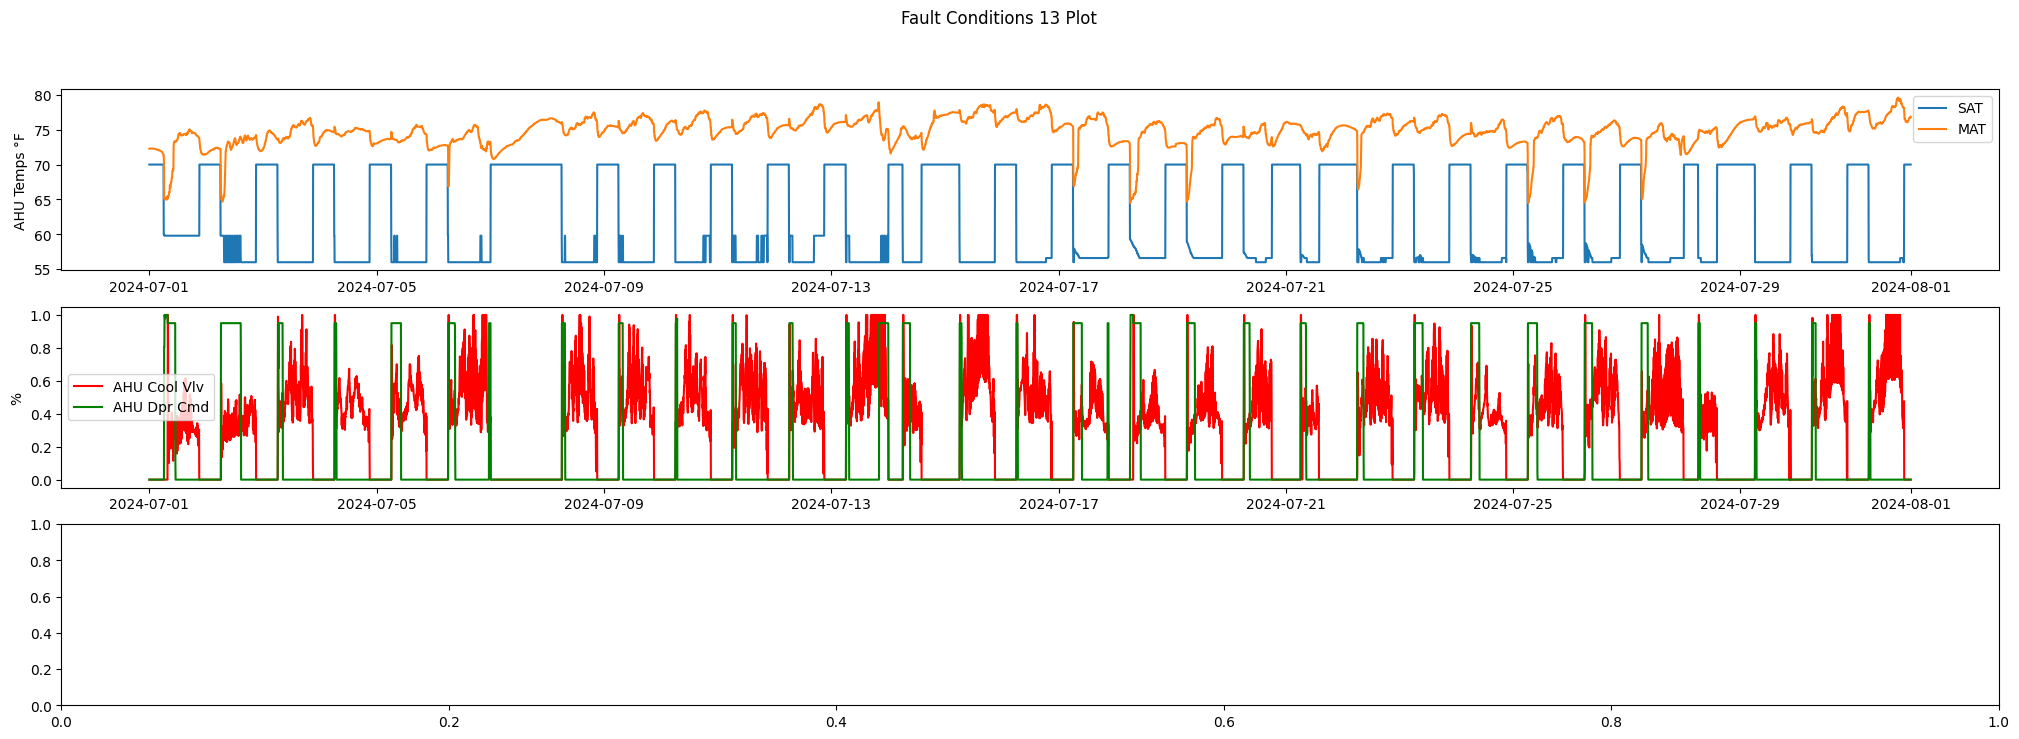

In [26]:
from open_fdd.air_handling_unit.reports.report_fc13 import FaultCodeThirteenReport

# Create an instance of FaultCodeFourReport
fc13_report = FaultCodeThirteenReport(config_dict)
fc13_report.display_report_in_ipython(df_combined)

<Axes: xlabel='timestamp'>

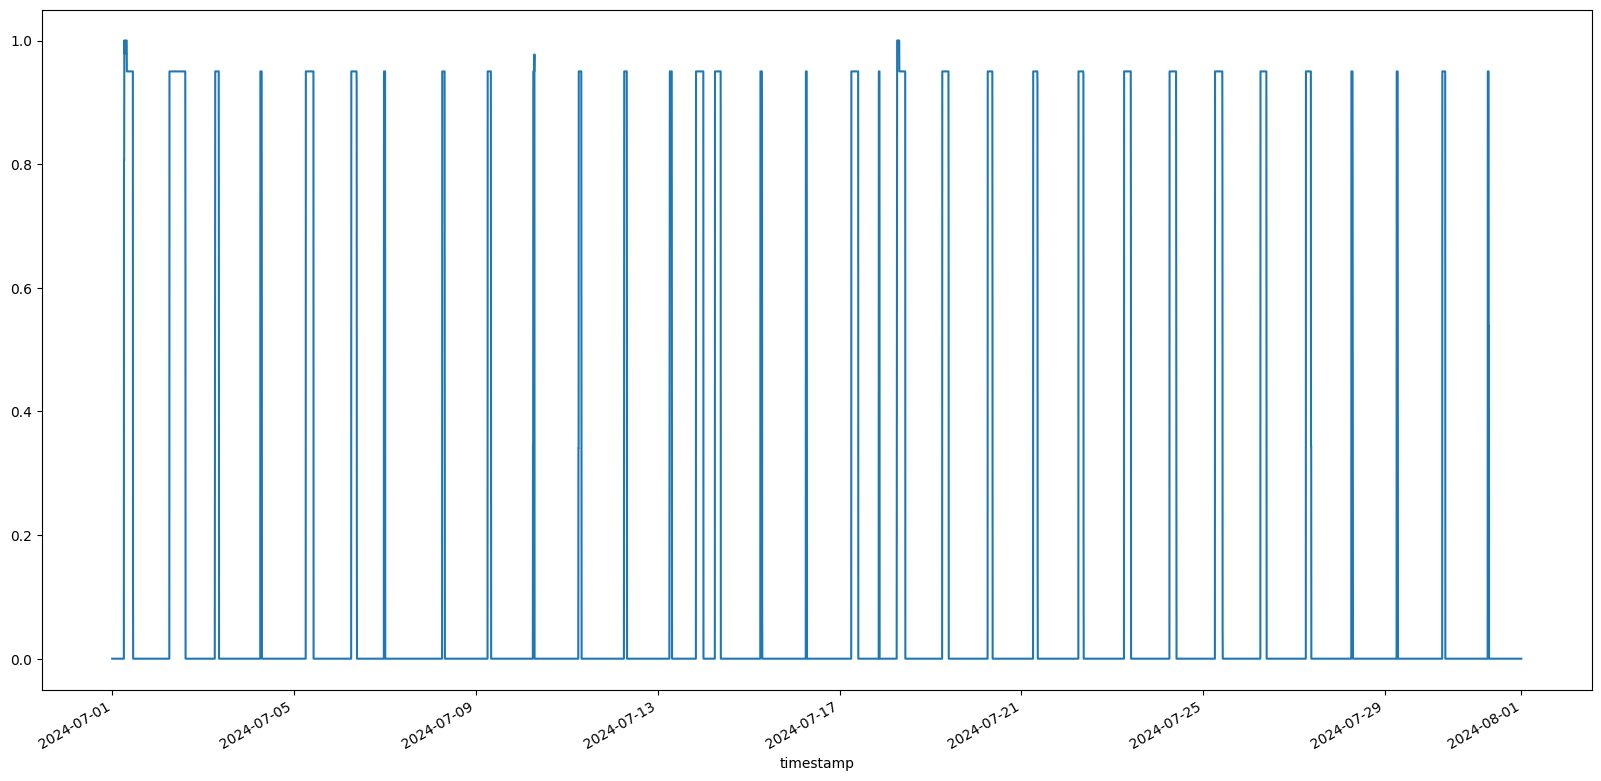

In [ ]:
df_combined['Ma_Dampers'].plot(figsize=(20, 10))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Ensure the DataFrame index is in DateTime format
df_combined.index = pd.to_datetime(df_combined.index)

# Select three random days in January 2024
random_days = pd.date_range(start='2024-01-01', end='2024-01-31', freq='D')
random_days = np.random.choice(random_days, 3, replace=False)


for day in random_days:
    # Plot the 'Ma_Dampers' column for each of the three random days
    plt.figure(figsize=(20, 10))

    day = pd.Timestamp(day)  # Convert numpy.datetime64 to pandas Timestamp
    day_str = day.strftime('%Y-%m-%d')
    df_specific_day = df_combined.loc[day_str]
    plt.plot(df_specific_day.index, df_specific_day['Ma_Dampers'], label=day_str)

    # Set plot title and labels
    plt.title('Ma Dampers on Three Random Days in January 2024')
    plt.xlabel('Time')
    plt.ylabel('Ma Dampers')
    plt.legend()

    # Show the plot
    plt.show()


KeyError: '2024-01-16'

<Figure size 2000x1000 with 0 Axes>